<a href="https://colab.research.google.com/github/Abiramibeeyou/Exploratory-Data-Analysis/blob/main/22BDS0428.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODULE 2 - DATA TRANSFORMATION

CO1: Handle missing data in the real world data sets by choosing appropriate methods.


Many beginner developers get confused when working with pandas dataframes, especially regarding when to use **append, concat, merge, or join**. Let's assume that you are working at a university as a professor teaching a Software Engineering course and an Introduction to Machine Learning course, and there are enough students to split into two classes. Checkout the following Screenshot.

In [155]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv')
dff=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv')
df.head(10)

rownames     city  year  month  sales      volume   median  listings  \
0         1  Abilene  2000      1   72.0   5380000.0  71400.0     701.0   
1         2  Abilene  2000      2   98.0   6505000.0  58700.0     746.0   
2         3  Abilene  2000      3  130.0   9285000.0  58100.0     784.0   
3         4  Abilene  2000      4   98.0   9730000.0  68600.0     785.0   
4         5  Abilene  2000      5  141.0  10590000.0  67300.0     794.0   
5         6  Abilene  2000      6  156.0  13910000.0  66900.0     780.0   
6         7  Abilene  2000      7  152.0  12635000.0  73500.0     742.0   
7         8  Abilene  2000      8  131.0  10710000.0  75000.0     765.0   
8         9  Abilene  2000      9  104.0   7615000.0  64500.0     771.0   
9        10  Abilene  2000     10  101.0   7040000.0  59300.0     764.0   

   inventory         date  
0        6.3  2000.000000  
1        6.6  2000.083333  
2        6.8  2000.166667  
3        6.9  2000.250000  
4        6.8  2000.333333  
5        6.6  2000.416667  
6        6.2  2000.500000  
7        6.4  2000.583333  
8        6.5  2000.666667  
9        6.6  2000.750000

In [156]:
#The structure of the dataframes is the same in both cases.
#In this case, we would need to concatenate them.
#We can do that by using the pandas concat() method
# In the dataset above, the first column contains information about student identifier and the second column contains their respective scores in any subject.
#The structure of the dataframes is same in the bothe case. In this case, we would need to concatenate both of them.
# We can do that by using Pandas concat() method.
#Output: A single dataframe combining both of the tables - ignore_index
#The ignore_index argument creates a new index


df1=df['listings'].head(10)
df2=df['inventory'].head(10)
dataframe = pd.concat([df1, df2], ignore_index=True)
dataframe

0     701.0
1     746.0
2     784.0
3     785.0
4     794.0
5     780.0
6     742.0
7     765.0
8     771.0
9     764.0
10      6.3
11      6.6
12      6.8
13      6.9
14      6.8
15      6.6
16      6.2
17      6.4
18      6.5
19      6.6
dtype: float64

In [157]:
# if we want to combine them side by side
pd.concat([df1, df2], axis=1)

listings  inventory
0     701.0        6.3
1     746.0        6.6
2     784.0        6.8
3     785.0        6.9
4     794.0        6.8
5     780.0        6.6
6     742.0        6.2
7     765.0        6.4
8     771.0        6.5
9     764.0        6.6

**Merging**

Now, consider another Listings and Inventory from our dataset




In [158]:
# Option 1
df1listings = df[['rownames','listings']].head(10)
df2listings = df[['rownames','listings']].tail(10)
df1Inventory = df[['rownames','inventory']].head(8)
df2Inventory = df[['rownames','inventory']].tail(8)
dflistings= pd.concat([df1listings,df2listings],ignore_index=True)
dfInventory= pd.concat([df1Inventory,df2Inventory],ignore_index=True)
dfLI = pd.concat([dflistings,dfInventory],axis=1)
dfLI

rownames  listings  rownames  inventory
0          1     701.0       1.0        6.3
1          2     746.0       2.0        6.6
2          3     784.0       3.0        6.8
3          4     785.0       4.0        6.9
4          5     794.0       5.0        6.8
5          6     780.0       6.0        6.6
6          7     742.0       7.0        6.2
7          8     765.0       8.0        6.4
8          9     771.0    8595.0        7.0
9         10     764.0    8596.0        7.2
10      8593     905.0    8597.0        6.8
11      8594     870.0    8598.0        6.8
12      8595     821.0    8599.0        6.4
13      8596     829.0    8600.0        6.4
14      8597     795.0    8601.0        6.2
15      8598     818.0    8602.0        6.5
16      8599     760.0       NaN        NaN
17      8600     776.0       NaN        NaN
18      8601     770.0       NaN        NaN
19      8602     811.0       NaN        NaN

In [159]:
#Option 2
dfLI = dflistings.merge(dfInventory,how='inner')
dfLI
# Here, you will perform inner join with each dataframe. That is to say, if an item exists on the both dataframe, will be included in the new dataframe. This means, we will get the list of students who are appearing in both the courses.



rownames  listings  inventory
0          1     701.0        6.3
1          2     746.0        6.6
2          3     784.0        6.8
3          4     785.0        6.9
4          5     794.0        6.8
5          6     780.0        6.6
6          7     742.0        6.2
7          8     765.0        6.4
8       8595     821.0        7.0
9       8596     829.0        7.2
10      8597     795.0        6.8
11      8598     818.0        6.8
12      8599     760.0        6.4
13      8600     776.0        6.4
14      8601     770.0        6.2
15      8602     811.0        6.5

In [160]:
#Option 3
dfLI = dflistings.merge(dfInventory,how='left')
dfLI

rownames  listings  inventory
0          1     701.0        6.3
1          2     746.0        6.6
2          3     784.0        6.8
3          4     785.0        6.9
4          5     794.0        6.8
5          6     780.0        6.6
6          7     742.0        6.2
7          8     765.0        6.4
8          9     771.0        NaN
9         10     764.0        NaN
10      8593     905.0        NaN
11      8594     870.0        NaN
12      8595     821.0        7.0
13      8596     829.0        7.2
14      8597     795.0        6.8
15      8598     818.0        6.8
16      8599     760.0        6.4
17      8600     776.0        6.4
18      8601     770.0        6.2
19      8602     811.0        6.5

In [161]:
#option 4
dfLI = dflistings.merge(dfInventory,how='right')
dfLI

rownames  listings  inventory
0          1     701.0        6.3
1          2     746.0        6.6
2          3     784.0        6.8
3          4     785.0        6.9
4          5     794.0        6.8
5          6     780.0        6.6
6          7     742.0        6.2
7          8     765.0        6.4
8       8595     821.0        7.0
9       8596     829.0        7.2
10      8597     795.0        6.8
11      8598     818.0        6.8
12      8599     760.0        6.4
13      8600     776.0        6.4
14      8601     770.0        6.2
15      8602     811.0        6.5

In [162]:
#Add new colum that is the total price based on the quantity and the unit price
# ListingsPerMonth: The number of listings per month
df['ListingsPerMonth'] = df['listings'] / df['month']
df.head(10)

rownames     city  year  month  sales      volume   median  listings  \
0         1  Abilene  2000      1   72.0   5380000.0  71400.0     701.0   
1         2  Abilene  2000      2   98.0   6505000.0  58700.0     746.0   
2         3  Abilene  2000      3  130.0   9285000.0  58100.0     784.0   
3         4  Abilene  2000      4   98.0   9730000.0  68600.0     785.0   
4         5  Abilene  2000      5  141.0  10590000.0  67300.0     794.0   
5         6  Abilene  2000      6  156.0  13910000.0  66900.0     780.0   
6         7  Abilene  2000      7  152.0  12635000.0  73500.0     742.0   
7         8  Abilene  2000      8  131.0  10710000.0  75000.0     765.0   
8         9  Abilene  2000      9  104.0   7615000.0  64500.0     771.0   
9        10  Abilene  2000     10  101.0   7040000.0  59300.0     764.0   

   inventory         date  ListingsPerMonth  
0        6.3  2000.000000        701.000000  
1        6.6  2000.083333        373.000000  
2        6.8  2000.166667        261.333333  
3        6.9  2000.250000        196.250000  
4        6.8  2000.333333        158.800000  
5        6.6  2000.416667        130.000000  
6        6.2  2000.500000        106.000000  
7        6.4  2000.583333         95.625000  
8        6.5  2000.666667         85.666667  
9        6.6  2000.750000         76.400000

In [163]:
df['city'].value_counts()

city
Abilene                  187
Port Arthur              187
Lubbock                  187
Lufkin                   187
McAllen                  187
Midland                  187
Montgomery County        187
Nacogdoches              187
NE Tarrant County        187
Odessa                   187
Paris                    187
San Angelo               187
Amarillo                 187
San Antonio              187
San Marcos               187
Sherman-Denison          187
South Padre Island       187
Temple-Belton            187
Texarkana                187
Tyler                    187
Victoria                 187
Waco                     187
Longview-Marshall        187
Laredo                   187
Killeen-Fort Hood        187
Kerrville                187
Arlington                187
Austin                   187
Bay Area                 187
Beaumont                 187
Brazoria County          187
Brownsville              187
Bryan-College Station    187
Collin County            187
Corpus Christi           187
Dallas                   187
Denton County            187
El Paso                  187
Fort Bend                187
Fort Worth               187
Galveston                187
Garland                  187
Harlingen                187
Houston                  187
Irving                   187
Wichita Falls            187
Name: count, dtype: int64

In [164]:
df.describe()

rownames         year        month        sales        volume  \
count  8602.000000  8602.000000  8602.000000  8034.000000  8.034000e+03   
mean   4301.500000  2007.299465     6.406417   549.564600  1.068586e+08   
std    2483.327841     4.502923     3.441932  1110.737179  2.449337e+08   
min       1.000000  2000.000000     1.000000     6.000000  8.350000e+05   
25%    2151.250000  2003.000000     3.000000    86.000000  1.084000e+07   
50%    4301.500000  2007.000000     6.000000   169.000000  2.298682e+07   
75%    6451.750000  2011.000000     9.000000   467.000000  7.512139e+07   
max    8602.000000  2015.000000    12.000000  8945.000000  2.568157e+09   

              median      listings    inventory         date  ListingsPerMonth  
count    7986.000000   7178.000000  7135.000000  8602.000000       7178.000000  
mean   128131.442524   3216.902340     7.174590  2007.750000        827.800005  
std     37359.575317   5968.331072     4.612125     4.498718       2209.252344  
min     50000.000000      0.000000     0.000000  2000.000000          0.000000  
25%    100000.000000    682.000000     4.900000  2003.833333        107.850000  
50%    123800.000000   1283.000000     6.200000  2007.750000        251.657143  
75%    150000.000000   2953.750000     8.150000  2011.666667        644.770833  
max    304200.000000  43107.000000    55.900000  2015.500000      39790.000000

**Reshaping with Hierarchical Indexing**


In [165]:
import pandas as pd
import numpy as np
data = np.arange(15).reshape((3,5))
indexers = ['Speed', 'Altitude', 'Temperature']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Falcon', 'Eagle', 'Hawk', 'Owl', 'Condor'])
dframe1




Falcon  Eagle  Hawk  Owl  Condor
Speed             0      1     2    3       4
Altitude          5      6     7    8       9
Temperature      10     11    12   13      14

In [166]:
stacked = dframe1.stack();
stacked

Speed        Falcon     0
             Eagle      1
             Hawk       2
             Owl        3
             Condor     4
Altitude     Falcon     5
             Eagle      6
             Hawk       7
             Owl        8
             Condor     9
Temperature  Falcon    10
             Eagle     11
             Hawk      12
             Owl       13
             Condor    14
dtype: int64

In [167]:
stacked.unstack()

Falcon  Eagle  Hawk  Owl  Condor
Speed             0      1     2    3       4
Altitude          5      6     7    8       9
Temperature      10     11    12   13      14

TRANSFORMATION TECHNIQUES

06-Jan-2025

Data deduplication

In the Merging database-style dataframes section, we saw how we can merge different types of series and dataframes. Now, let's dive more into how we can perform other types of data transformations including **cleaning, filtering, deduplication**, and others.

In [168]:
#Performing data deduplication
#1. Let's consider a simple dataframe, as follows:
#2. The pandas dataframe comes with a duplicated() method that returns a Boolean series stating which of the rows are duplicates:

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8597    False
8598    False
8599    False
8600    False
8601    False
Length: 8602, dtype: bool

In [169]:
#3. Now, we can drop these duplicates using the drop_duplicates() method:
dataframe = df.drop_duplicates()
dataframe

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            2        Abilene  2000      2   98.0   6505000.0   58700.0   
2            3        Abilene  2000      3  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  
0        701.0        6.3  2000.000000        701.000000  
1        746.0        6.6  2000.083333        373.000000  
2        784.0        6.8  2000.166667        261.333333  
3        785.0        6.9  2000.250000        196.250000  
4        794.0        6.8  2000.333333        158.800000  
...        ...        ...          ...               ...  
8597     818.0        6.8  2015.166667        272.666667  
8598     760.0        6.4  2015.250000        190.000000  
8599     776.0        6.4  2015.333333        155.200000  
8600     770.0        6.2  2015.416667        128.333333  
8601     811.0        6.5  2015.500000        115.857143  

[8602 rows x 11 columns]

In [170]:
#4. Let's add a new column and try to find duplicated items based on the second column:
dataframe = df.drop_duplicates(['city'])
dataframe

rownames                   city  year  month   sales       volume  \
0            1                Abilene  2000      1    72.0    5380000.0   
187        188               Amarillo  2000      1   102.0    8860000.0   
374        375              Arlington  2000      1   241.0   26220683.0   
561        562                 Austin  2000      1  1025.0  173053635.0   
748        749               Bay Area  2000      1   244.0   29322659.0   
935        936               Beaumont  2000      1    97.0   10100000.0   
1122      1123        Brazoria County  2000      1    55.0    5245000.0   
1309      1310            Brownsville  2000      1     NaN          NaN   
1496      1497  Bryan-College Station  2000      1    61.0    5615000.0   
1683      1684          Collin County  2000      1   464.0   94788821.0   
1870      1871         Corpus Christi  2000      1   182.0   17665000.0   
2057      2058                 Dallas  2000      1  2286.0  375389865.0   
2244      2245          Denton County  2000      1   313.0   50391510.0   
2431      2432                El Paso  2000      1   306.0   31525000.0   
2618      2619              Fort Bend  2000      1   343.0   52031964.0   
2805      2806             Fort Worth  2000      1   325.0   33417427.0   
2992      2993              Galveston  2000      1    37.0    4555000.0   
3179      3180                Garland  2000      1   147.0   13211361.0   
3366      3367              Harlingen  2000      1    31.0    3910000.0   
3553      3554                Houston  2000      1  2653.0  381805283.0   
3740      3741                 Irving  2000      1    69.0    8366542.0   
3927      3928              Kerrville  2000      1     NaN          NaN   
4114      4115      Killeen-Fort Hood  2000      1   101.0    7595000.0   
4301      4302                 Laredo  2000      1     NaN          NaN   
4488      4489      Longview-Marshall  2000      1    73.0    6170000.0   
4675      4676                Lubbock  2000      1   110.0   11615000.0   
4862      4863                 Lufkin  2000      1    28.0    2280000.0   
5049      5050                McAllen  2000      1    67.0    5590000.0   
5236      5237                Midland  2000      1     NaN          NaN   
5423      5424      Montgomery County  2000      1   259.0   41671055.0   
5610      5611            Nacogdoches  2000      1     NaN          NaN   
5797      5798      NE Tarrant County  2000      1   344.0   62405222.0   
5984      5985                 Odessa  2000      1     NaN          NaN   
6171      6172                  Paris  2000      1    19.0    1440000.0   
6358      6359            Port Arthur  2000      1    40.0    3090000.0   
6545      6546             San Angelo  2000      1    66.0    5670000.0   
6732      6733            San Antonio  2000      1   820.0   98974924.0   
6919      6920             San Marcos  2000      1    22.0    2380000.0   
7106      7107        Sherman-Denison  2000      1    44.0    3843807.0   
7293      7294     South Padre Island  2000      1     NaN          NaN   
7480      7481          Temple-Belton  2000      1    56.0    5775000.0   
7667      7668              Texarkana  2000      1     NaN          NaN   
7854      7855                  Tyler  2000      1   113.0   12425000.0   
8041      8042               Victoria  2000      1    40.0    3615000.0   
8228      8229                   Waco  2000      1    69.0    6652550.0   
8415      8416          Wichita Falls  2000      1    87.0    6710000.0   

        median  listings  inventory    date  ListingsPerMonth  
0      71400.0     701.0        6.3  2000.0             701.0  
187    80000.0     972.0        5.3  2000.0             972.0  
374    94000.0    1417.0        3.7  2000.0            1417.0  
561   133700.0    3084.0        2.0  2000.0            3084.0  
748   100700.0    1766.0        4.3  2000.0            1766.0  
935    82100.0     876.0        6.1  2000.0             876.0  
1122   74400.0     512.0        

2. Replacing Values


In [171]:
#find and replace some values inside a dataframE
df['month'].replace(to_replace=1,value=2)

0       2
1       2
2       3
3       4
4       5
       ..
8597    3
8598    4
8599    5
8600    6
8601    7
Name: month, Length: 8602, dtype: int64

In [172]:
#Two or More replacements.
df.replace(to_replace=[2,3],value=[1,2])

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            1        Abilene  2000      1   98.0   6505000.0   58700.0   
2            2        Abilene  2000      2  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      2  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  
0        701.0        6.3  2000.000000        701.000000  
1        746.0        6.6  2000.083333        373.000000  
2        784.0        6.8  2000.166667        261.333333  
3        785.0        6.9  2000.250000        196.250000  
4        794.0        6.8  2000.333333        158.800000  
...        ...        ...          ...               ...  
8597     818.0        6.8  2015.166667        272.666667  
8598     760.0        6.4  2015.250000        190.000000  
8599     776.0        6.4  2015.333333        155.200000  
8600     770.0        6.2  2015.416667        128.333333  
8601     811.0        6.5  2015.500000        115.857143  

[8602 rows x 11 columns]

3**.HANDLING MISSING DATA**

Whenever there are missing values, a NaN value is used, which indicates that there is no value specified for that particular index. There could be several reasons why a value could be NaN:

It can happen when data is retrieved from an external source and there are some incomplete values in the dataset.
It can also happen when we join two different datasets and some values are not matched.
Missing values due to data collection errors.
When the shape of data changes, there are new additional rows or columns that are not determined.
Reindexing of data can result in incomplete data.


In [173]:
#Note the following characteristics of missing values in the preceding dataframe:
#An entire row can contain NaN values.
#An entire column can contain NaN values.
#Some (but not necessarily all) values in both a row and a column can be NaN.
#NaN values in pandas objects
#1. Check the following example:
df.isnull()

rownames   city   year  month  sales  volume  median  listings  \
0        False  False  False  False  False   False   False     False   
1        False  False  False  False  False   False   False     False   
2        False  False  False  False  False   False   False     False   
3        False  False  False  False  False   False   False     False   
4        False  False  False  False  False   False   False     False   
...        ...    ...    ...    ...    ...     ...     ...       ...   
8597     False  False  False  False  False   False   False     False   
8598     False  False  False  False  False   False   False     False   
8599     False  False  False  False  False   False   False     False   
8600     False  False  False  False  False   False   False     False   
8601     False  False  False  False  False   False   False     False   

      inventory   date  ListingsPerMonth  
0         False  False             False  
1         False  False             False  
2         False  False             False  
3         False  False             False  
4         False  False             False  
...         ...    ...               ...  
8597      False  False             False  
8598      False  False             False  
8599      False  False             False  
8600      False  False             False  
8601      False  False             False  

[8602 rows x 11 columns]

In [174]:
#2. check it out in action:
df.notnull()

rownames  city  year  month  sales  volume  median  listings  inventory  \
0         True  True  True   True   True    True    True      True       True   
1         True  True  True   True   True    True    True      True       True   
2         True  True  True   True   True    True    True      True       True   
3         True  True  True   True   True    True    True      True       True   
4         True  True  True   True   True    True    True      True       True   
...        ...   ...   ...    ...    ...     ...     ...       ...        ...   
8597      True  True  True   True   True    True    True      True       True   
8598      True  True  True   True   True    True    True      True       True   
8599      True  True  True   True   True    True    True      True       True   
8600      True  True  True   True   True    True    True      True       True   
8601      True  True  True   True   True    True    True      True       True   

      date  ListingsPerMonth  
0     True              True  
1     True              True  
2     True              True  
3     True              True  
4     True              True  
...    ...               ...  
8597  True              True  
8598  True              True  
8599  True              True  
8600  True              True  
8601  True              True  

[8602 rows x 11 columns]

In [175]:
#3. We can use the sum() method to count the number of NaN values in each store.
df.isnull().sum()

rownames               0
city                   0
year                   0
month                  0
sales                568
volume               568
median               616
listings            1424
inventory           1467
date                   0
ListingsPerMonth    1424
dtype: int64

In [176]:
#4. We can go one level deeper to find the total number of missing values
df.isnull().sum().sum()


6067

In [177]:
#5. So, instead of counting the number of missing values, we can count the number of reported values:
df.count()

rownames            8602
city                8602
year                8602
month               8602
sales               8034
volume              8034
median              7986
listings            7178
inventory           7135
date                8602
ListingsPerMonth    7178
dtype: int64

4**. Dropping missing values**

One of the ways to handle missing values is to simply remove them from our dataset. We have seen that we can use the isnull() and notnull() functions from the pandas library to determine null values



In [178]:
df.sales[df.sales.notnull()]

0        72.0
1        98.0
2       130.0
3        98.0
4       141.0
        ...  
8597    152.0
8598    129.0
8599    174.0
8600    143.0
8601    172.0
Name: sales, Length: 8034, dtype: float64

In [179]:
df.sales.dropna()
#Note that the dropna() method just returns a copy of the dataframe by dropping the rows with NaN.



0        72.0
1        98.0
2       130.0
3        98.0
4       141.0
        ...  
8597    152.0
8598    129.0
8599    174.0
8600    143.0
8601    172.0
Name: sales, Length: 8034, dtype: float64

In [180]:
#If dropna() is applied to the entire dataframe, then it will drop all the rows from the dataframe, because there is at least one NaN value in our dataframe:
df.dropna()

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            2        Abilene  2000      2   98.0   6505000.0   58700.0   
2            3        Abilene  2000      3  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  
0        701.0        6.3  2000.000000        701.000000  
1        746.0        6.6  2000.083333        373.000000  
2        784.0        6.8  2000.166667        261.333333  
3        785.0        6.9  2000.250000        196.250000  
4        794.0        6.8  2000.333333        158.800000  
...        ...        ...          ...               ...  
8597     818.0        6.8  2015.166667        272.666667  
8598     760.0        6.4  2015.250000        190.000000  
8599     776.0        6.4  2015.333333        155.200000  
8600     770.0        6.2  2015.416667        128.333333  
8601     811.0        6.5  2015.500000        115.857143  

[7126 rows x 11 columns]

In [181]:
#####Dropping by rows
#We can also drop rows that have NaN values. To do so, we can use the how=all argument to drop only those rows entire values are entirely NaN:
df.dropna(how='all')

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            2        Abilene  2000      2   98.0   6505000.0   58700.0   
2            3        Abilene  2000      3  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  
0        701.0        6.3  2000.000000        701.000000  
1        746.0        6.6  2000.083333        373.000000  
2        784.0        6.8  2000.166667        261.333333  
3        785.0        6.9  2000.250000        196.250000  
4        794.0        6.8  2000.333333        158.800000  
...        ...        ...          ...               ...  
8597     818.0        6.8  2015.166667        272.666667  
8598     760.0        6.4  2015.250000        190.000000  
8599     776.0        6.4  2015.333333        155.200000  
8600     770.0        6.2  2015.416667        128.333333  
8601     811.0        6.5  2015.500000        115.857143  

[8602 rows x 11 columns]

In [182]:


#Dropping by columns
#Furthermore, we can also pass axis=1 to indicate a check for NaN by columns.
df.dropna(how='all', axis=1)

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            2        Abilene  2000      2   98.0   6505000.0   58700.0   
2            3        Abilene  2000      3  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  
0        701.0        6.3  2000.000000        701.000000  
1        746.0        6.6  2000.083333        373.000000  
2        784.0        6.8  2000.166667        261.333333  
3        785.0        6.9  2000.250000        196.250000  
4        794.0        6.8  2000.333333        158.800000  
...        ...        ...          ...               ...  
8597     818.0        6.8  2015.166667        272.666667  
8598     760.0        6.4  2015.250000        190.000000  
8599     776.0        6.4  2015.333333        155.200000  
8600     770.0        6.2  2015.416667        128.333333  
8601     811.0        6.5  2015.500000        115.857143  

[8602 rows x 11 columns]

In [183]:
#we can also pass another argument, thresh, to specify a minimum number of NaNs that must exist before the column should be dropped:
df.dropna(thresh=5, axis=1)

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            2        Abilene  2000      2   98.0   6505000.0   58700.0   
2            3        Abilene  2000      3  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  
0        701.0        6.3  2000.000000        701.000000  
1        746.0        6.6  2000.083333        373.000000  
2        784.0        6.8  2000.166667        261.333333  
3        785.0        6.9  2000.250000        196.250000  
4        794.0        6.8  2000.333333        158.800000  
...        ...        ...          ...               ...  
8597     818.0        6.8  2015.166667        272.666667  
8598     760.0        6.4  2015.250000        190.000000  
8599     776.0        6.4  2015.333333        155.200000  
8600     770.0        6.2  2015.416667        128.333333  
8601     811.0        6.5  2015.500000        115.857143  

[8602 rows x 11 columns]

In [184]:
#Mathematical operations with NaN
ar1=dff['volume'].to_numpy()
ser1=dff['volume']
ar1.mean(),ser1.mean()

(nan, 106858620.78080657)

Note the following things:

When a ** NumPy** function encounters NaN values, it returns NaN.
Pandas, on the other hand, ignores the NaN values and moves ahead with processing. When performing the sum operation, NaN is treated as 0. If all the values are NaN, the result is also NaN.

In [185]:
#Let's compute the Total Volume
ser2=dff.volume
ser2.sum()

858502159353.0

In [186]:
#Average
ser2.mean()

106858620.78080657

In [187]:
#cumulative Summing
ser2.cumsum()

0       5.380000e+06
1       1.188500e+07
2       2.117000e+07
3       3.090000e+07
4       4.149000e+07
            ...     
8597    8.584248e+11
8598    8.584403e+11
8599    8.584595e+11
8600    8.584783e+11
8601    8.585022e+11
Name: volume, Length: 8602, dtype: float64

**5.Filling Missing values**

In [188]:
#We can use the fillna() method to replace NaN values with any particular values.
filledDf=df.fillna(0)
filledDf

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            2        Abilene  2000      2   98.0   6505000.0   58700.0   
2            3        Abilene  2000      3  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  
0        701.0        6.3  2000.000000        701.000000  
1        746.0        6.6  2000.083333        373.000000  
2        784.0        6.8  2000.166667        261.333333  
3        785.0        6.9  2000.250000        196.250000  
4        794.0        6.8  2000.333333        158.800000  
...        ...        ...          ...               ...  
8597     818.0        6.8  2015.166667        272.666667  
8598     760.0        6.4  2015.250000        190.000000  
8599     776.0        6.4  2015.333333        155.200000  
8600     770.0        6.2  2015.416667        128.333333  
8601     811.0        6.5  2015.500000        115.857143  

[8602 rows x 11 columns]

In [189]:
#Check the difference in the following between NaN and NA filling
df['sales'].mean()

549.5646004480956

In [190]:
filledDf['sales'].mean()

513.2762148337596

In [191]:
#Backward and forward filling
#forward-filling - method = ffill
df.sales.fillna(method='ffill')

<ipython-input-191-dd7a6a69969f>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.sales.fillna(method='ffill')


0        72.0
1        98.0
2       130.0
3        98.0
4       141.0
        ...  
8597    152.0
8598    129.0
8599    174.0
8600    143.0
8601    172.0
Name: sales, Length: 8602, dtype: float64

In [192]:
df.sales.fillna(method='bfill')

<ipython-input-192-0c91b74eee7c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.sales.fillna(method='bfill')


0        72.0
1        98.0
2       130.0
3        98.0
4       141.0
        ...  
8597    152.0
8598    129.0
8599    174.0
8600    143.0
8601    172.0
Name: sales, Length: 8602, dtype: float64

**DISCRETIZATION AND BINNING**

Often when working with continuous datasets, we need to convert them into discrete or interval forms.
Each interval is referred to as a bin, and hence the name binning comes into play


In [194]:
sales=df['sales'].head(20)
sales

0      72.0
1      98.0
2     130.0
3      98.0
4     141.0
5     156.0
6     152.0
7     131.0
8     104.0
9     101.0
10    100.0
11     92.0
12     75.0
13    112.0
14    118.0
15    105.0
16    150.0
17    139.0
18    134.0
19    151.0
Name: sales, dtype: float64

In [195]:
#To convert the preceding dataset into intervals, we can use the cut() method from pandas
bins = [70, 99, 129, 149, 160]
category =pd.cut(sales,bins)
category

0       (70, 99]
1       (70, 99]
2     (129, 149]
3       (70, 99]
4     (129, 149]
5     (149, 160]
6     (149, 160]
7     (129, 149]
8      (99, 129]
9      (99, 129]
10     (99, 129]
11      (70, 99]
12      (70, 99]
13     (99, 129]
14     (99, 129]
15     (99, 129]
16    (149, 160]
17    (129, 149]
18    (129, 149]
19    (149, 160]
Name: sales, dtype: category
Categories (4, interval[int64, right]): [(70, 99] < (99, 129] < (129, 149] < (149, 160]]

In [196]:
#We can check the number of values in each bin by using the pd.value_counts() method
pd.value_counts(category)

<ipython-input-196-5d6805f98703>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(category)


sales
(99, 129]     6
(70, 99]      5
(129, 149]    5
(149, 160]    4
Name: count, dtype: int64

In [197]:
#We can also indicate the bin names by passing a list of label
bin_names=['Low Sales','Moderate Sales','High Sales','Very High sales']
pd.cut(sales, bins, labels=bin_names)

0           Low Sales
1           Low Sales
2          High Sales
3           Low Sales
4          High Sales
5     Very High sales
6     Very High sales
7          High Sales
8      Moderate Sales
9      Moderate Sales
10     Moderate Sales
11          Low Sales
12          Low Sales
13     Moderate Sales
14     Moderate Sales
15     Moderate Sales
16    Very High sales
17         High Sales
18         High Sales
19    Very High sales
Name: sales, dtype: category
Categories (4, object): ['Low Sales' < 'Moderate Sales' < 'High Sales' < 'Very High sales']

In [198]:
#it is essential to note that if we pass just an integer for our bins,
#it will compute equal-length bins based on the minimum and maximum values in the data.
import numpy as np
#print(np.random.rand(40))  #Random numbers between 0 to 1
pd.cut(np.random.rand(40), 5, precision=2)

[(0.023, 0.21], (0.21, 0.4], (0.58, 0.77], (0.58, 0.77], (0.21, 0.4], ..., (0.4, 0.58], (0.4, 0.58], (0.58, 0.77], (0.77, 0.95], (0.21, 0.4]]
Length: 40
Categories (5, interval[float64, right]): [(0.023, 0.21] < (0.21, 0.4] < (0.4, 0.58] < (0.58, 0.77] <
                                           (0.77, 0.95]]

In [199]:
#Panda provides a qcut method that forms the bins based on sample quantiles
randomNumbers = np.random.rand(2000)
category3 = pd.qcut(randomNumbers, 4) # cut into quartiles
category3

[(0.259, 0.501], (0.259, 0.501], (-0.000813, 0.259], (0.756, 0.999], (-0.000813, 0.259], ..., (0.501, 0.756], (-0.000813, 0.259], (0.501, 0.756], (0.756, 0.999], (0.501, 0.756]]
Length: 2000
Categories (4, interval[float64, right]): [(-0.000813, 0.259] < (0.259, 0.501] < (0.501, 0.756] <
                                           (0.756, 0.999]]

In [200]:

#Based on the number of bins, which we set to 4, it converted our data into four different categories.
#If we count the number of values in each category, we should get equal-sized bins as per our definition.
pd.value_counts(category3)

<ipython-input-200-71f9c193185e>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(category3)


(-0.000813, 0.259]    500
(0.259, 0.501]        500
(0.501, 0.756]        500
(0.756, 0.999]        500
Name: count, dtype: int64

**Outlier detection and filtering**

Outliers are data points that diverge from other observations for several reasons.

During the EDA phase, one of our common tasks is to detect and filter these outliers.

The main reason for this detection and filtering of outliers is that the presence of such outliers can cause serious issues in statistical analysis.

In [201]:
#suppose we want to calculate the total price based on the Sales and the Volume.
df['TotalPrice'] = df['sales'] * df['listings']
df

rownames           city  year  month  sales      volume    median  \
0            1        Abilene  2000      1   72.0   5380000.0   71400.0   
1            2        Abilene  2000      2   98.0   6505000.0   58700.0   
2            3        Abilene  2000      3  130.0   9285000.0   58100.0   
3            4        Abilene  2000      4   98.0   9730000.0   68600.0   
4            5        Abilene  2000      5  141.0  10590000.0   67300.0   
...        ...            ...   ...    ...    ...         ...       ...   
8597      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
8598      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  ListingsPerMonth  TotalPrice  
0        701.0        6.3  2000.000000        701.000000     50472.0  
1        746.0        6.6  2000.083333        373.000000     73108.0  
2        784.0        6.8  2000.166667        261.333333    101920.0  
3        785.0        6.9  2000.250000        196.250000     76930.0  
4        794.0        6.8  2000.333333        158.800000    111954.0  
...        ...        ...          ...               ...         ...  
8597     818.0        6.8  2015.166667        272.666667    124336.0  
8598     760.0        6.4  2015.250000        190.000000     98040.0  
8599     776.0        6.4  2015.333333        155.200000    135024.0  
8600     770.0        6.2  2015.416667        128.333333    110110.0  
8601     811.0        6.5  2015.500000        115.857143    139492.0  

[8602 rows x 12 columns]

In [ ]:
#Let's find the transaction that exceeded 3,000,000:
TotalTransaction = df["TotalPrice"]
TotalTransaction[np.abs(TotalTransaction) > 3000000]

561      3161100.0
562      3816953.0
563      4876326.0
564      4966752.0
565      7161660.0
           ...    
6914    18192480.0
6915    20550600.0
6916    22625292.0
6917    26577495.0
6918    28026444.0
Name: TotalPrice, Length: 1128, dtype: float64

INTRODUCING CORRELATION'



*   Any dataset that we want to
analyze will have different fields (that is, columns) of multiple observations (that is, variables) representing different facts.

*  The columns of a dataset are, most probably, related to one another because they are collected from the same event.
One field of record may or may not affect the value of another field.
*  To examine the type of relationships these columns have and to analyze the causes and effects between them, we have to work to find the dependencies that exist among variables.

* The strength of such a relationship between two fields of a dataset is called correlation, which is represented by a numerical value between -1 and 1.

* Scatter plots show how much one variable is affected by another:




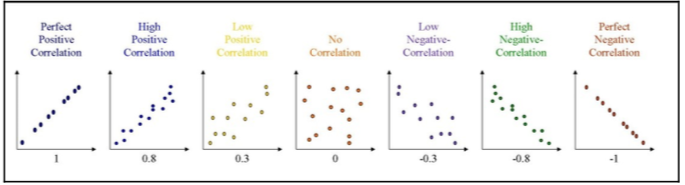

**Types of Analysis**

1.**Univariate Analysis** - Mainly for Description

2.**Bivariate Analysis **-
Determining the empirical relationship between the two variables.

3.**Multivariate Analysis** -
Determining the empirical relationship among multiple variables.

**Univariate analysis**

*   Analysis on a single type of dataset is called univariate analysis.
*   Simplest form of analyzing data: Data has only one type of variable.

*   The main purpose of univariate analysis is to take data, summarize that data, and find patterns among the values.

*  Several techniques that describe the patterns found in univariate data

   *   Central tendency: the mean, mode, and median.
   *   Dispersion: the range, variance, maximum and minimum quartiles

   * Interquartile range and standard deviation








In [ ]:
#Measures of central tendency
#Mean/average
#Median
#Mode

#Measures of dispersion
#Standard deviation
#The standard deviation is the average/mean of the difference between each value in the dataset
#with its average/mean; that is, how data is spread out from the mean.
#If the standard deviation of the dataset is low, then the data points tend to be close to the mean of the dataset,
#otherwise, the data points are spread out over a wider range of values.

#Variance
#Variance is the square of the average/mean of the difference between each value in the dataset with its average/mean;
#that is, it is the square of standard deviation.

In [202]:
#1. Start by importing the required libraries and loading the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [203]:

#2. Load the dataset and Display First and Last 3 rows of the dataset
dtf=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv")
print(dtf.head(3))
print(dtf.tail(3))

   rownames     city  year  month  sales     volume   median  listings  \
0         1  Abilene  2000      1   72.0  5380000.0  71400.0     701.0   
1         2  Abilene  2000      2   98.0  6505000.0  58700.0     746.0   
2         3  Abilene  2000      3  130.0  9285000.0  58100.0     784.0   

   inventory         date  
0        6.3  2000.000000  
1        6.6  2000.083333  
2        6.8  2000.166667  
      rownames           city  year  month  sales      volume    median  \
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  
8599     776.0        6.4  2015.333333  
8600     770.0        6.2  2015.416667  
8601     811.0        6.5  2015.500000  


In [204]:
#3. Check the data types of each column
dtf.dtypes

rownames       int64
city          object
year           int64
month          int64
sales        float64
volume       float64
median       float64
listings     float64
inventory    float64
date         float64
dtype: object

In [ ]:
#5. Find the descriptive Statistics of the entire dataset
print(dtf.describe())
pd.isna(dtf).any()

          rownames         year        month        sales        volume  \
count  8602.000000  8602.000000  8602.000000  8034.000000  8.034000e+03   
mean   4301.500000  2007.299465     6.406417   549.564600  1.068586e+08   
std    2483.327841     4.502923     3.441932  1110.737179  2.449337e+08   
min       1.000000  2000.000000     1.000000     6.000000  8.350000e+05   
25%    2151.250000  2003.000000     3.000000    86.000000  1.084000e+07   
50%    4301.500000  2007.000000     6.000000   169.000000  2.298682e+07   
75%    6451.750000  2011.000000     9.000000   467.000000  7.512139e+07   
max    8602.000000  2015.000000    12.000000  8945.000000  2.568157e+09   

              median      listings    inventory         date  
count    7986.000000   7178.000000  7135.000000  8602.000000  
mean   128131.442524   3216.902340     7.174590  2007.750000  
std     37359.575317   5968.331072     4.612125     4.498718  
min     50000.000000      0.000000     0.000000  2000.000000  
25%    10

rownames     False
city         False
year         False
month        False
sales         True
volume        True
median        True
listings      True
inventory     True
date         False
dtype: bool

**DATA CLEANING**

In [205]:
# Find out the number of values which are not numeric
dtf['sales'].str.isnumeric().value_counts()

AttributeError: Can only use .str accessor with string values!

In [ ]:
# List out the values which are not numeric
dtf['sales'].str.replace('.', '', regex=False).str.isnumeric()



0       True
1       True
2       True
3       True
4       True
        ... 
8597    True
8598    True
8599    True
8600    True
8601    True
Name: sales, Length: 8602, dtype: bool

In [207]:
#6. compute the measure of central tendency of the height column.
#Descriptive Statistics
#Calculate mean, median and mode of dat set height

mean = dtf["sales"].mean()
median =dtf["sales"].median()
mode = dtf["sales"].mode()
print(mean , median, mode)

549.5646004480956 169.0 0    68.0
1    77.0
Name: sales, dtype: float64


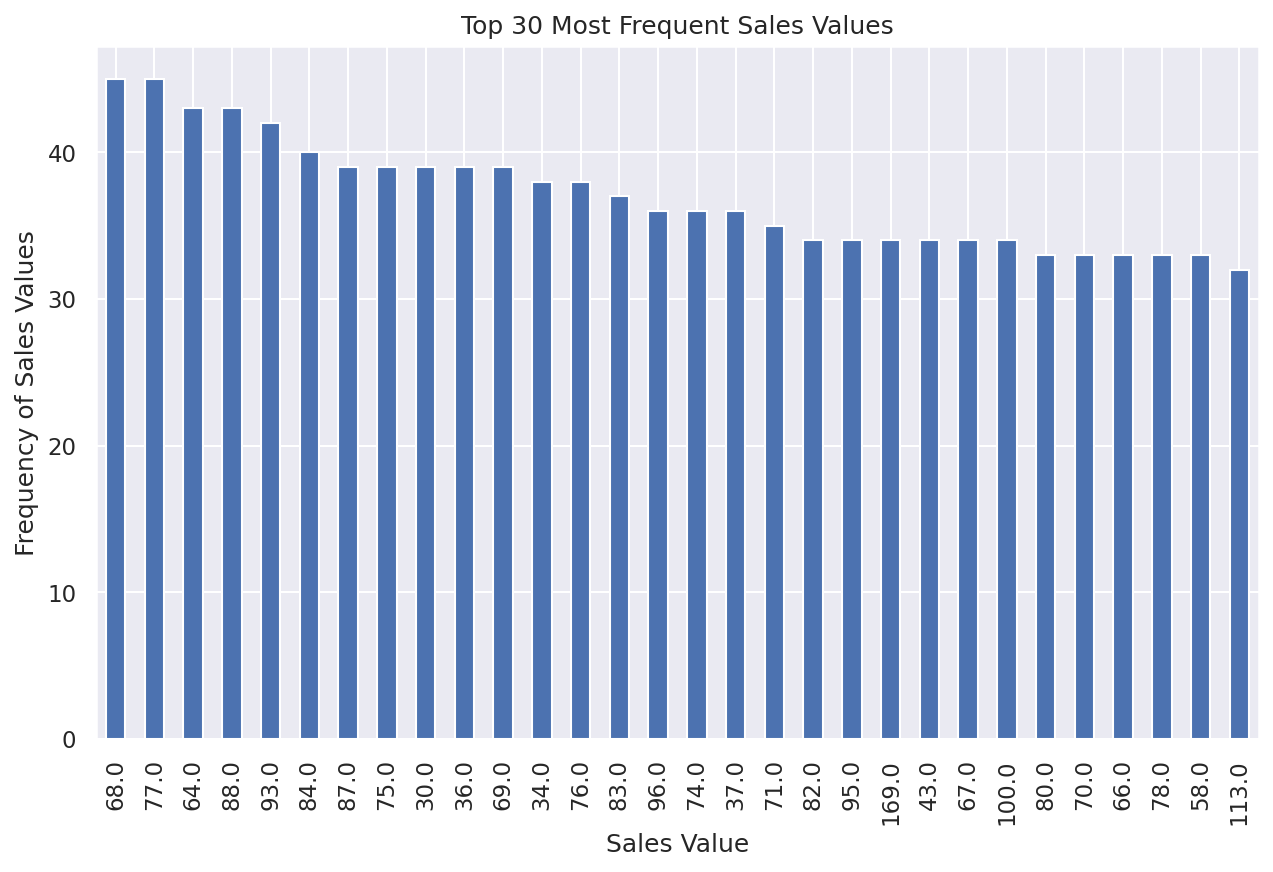

In [206]:
#7. First 30 largest values and draw a bar chart
dtf.sales.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.xlabel("Sales Value")
plt.ylabel("Frequency of Sales Values")
plt.title("Top 30 Most Frequent Sales Values")
plt.show()


**UNIVARIATE ANALYSIS**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


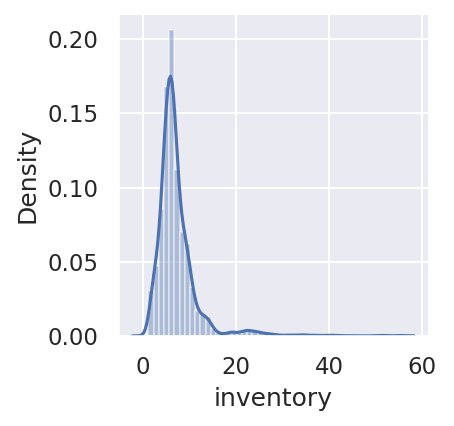

In [208]:
#8. Distribution plot
sns.FacetGrid(dtf).map(sns.distplot,"inventory").add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


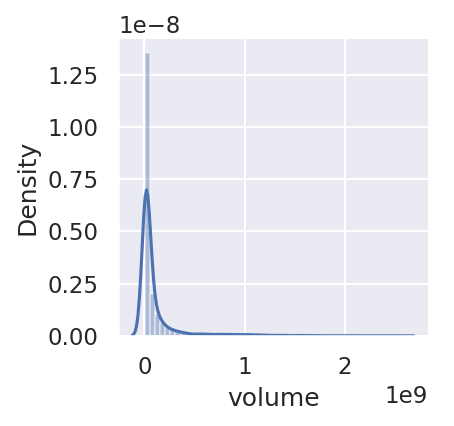

In [209]:
#distribution plot
sns.FacetGrid(dtf).map(sns.distplot,"volume").add_legend()

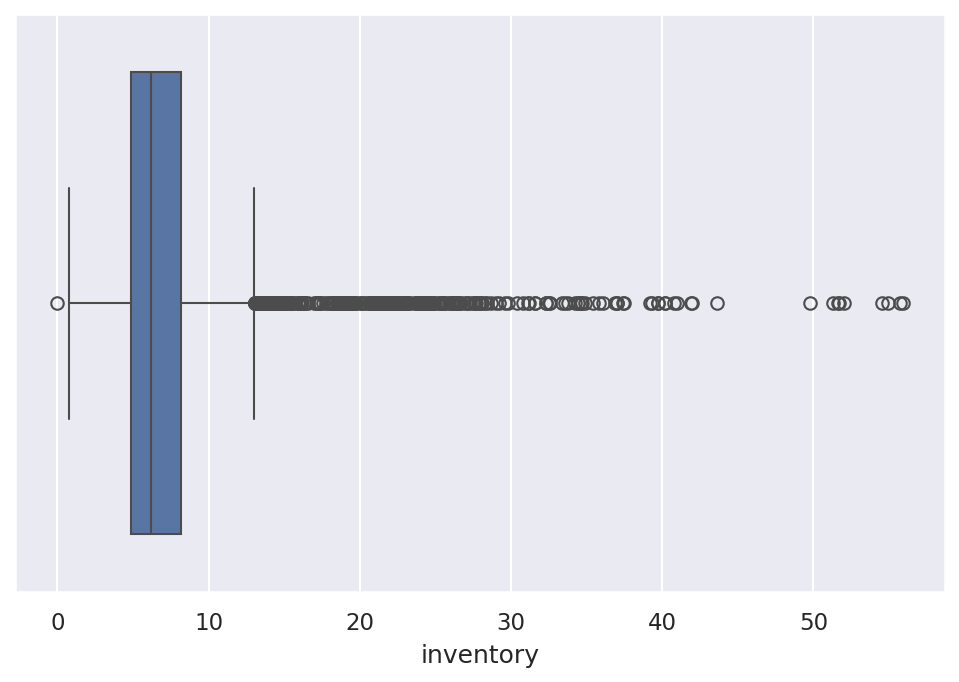

In [210]:
#boxplot for price of cars
sns.boxplot(x="inventory",data=dtf)
plt.show()


*  The right border of the box is Q3, that is, the third quartile, and the left border of the box is Q1, that is, the first quartile.
*   Lines extend from both sides of the box boundaries toward the minimum and maximum. *Based on the convention that our plotting tool uses, though, they may only extend to a certain statistic; any values beyond these statistics are marked as outliers (using points)


**BIVARIATE ANALYSIS**



*  The analysis of more than one (that is, exactly two) type of variable.

*   Bivariate analysis is used to find out whether there is a relationship between two different variables.

*  Generally, bivariate analysis helps us to predict a value for one variable (that is, a dependent variable) if we are aware of the value of the independent variable.

*   The scatter plot for bivariate analysis, where Sales and Advertising Dollars are two variables.


*   While plotting a scatter plot, we can see that the sales values are dependent on the advertising dollars; that is, as the advertising dollars increase, the sales values also increase.









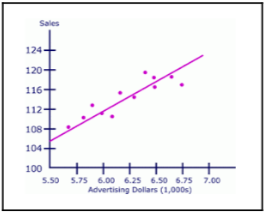

Text(0, 0.5, 'volume')

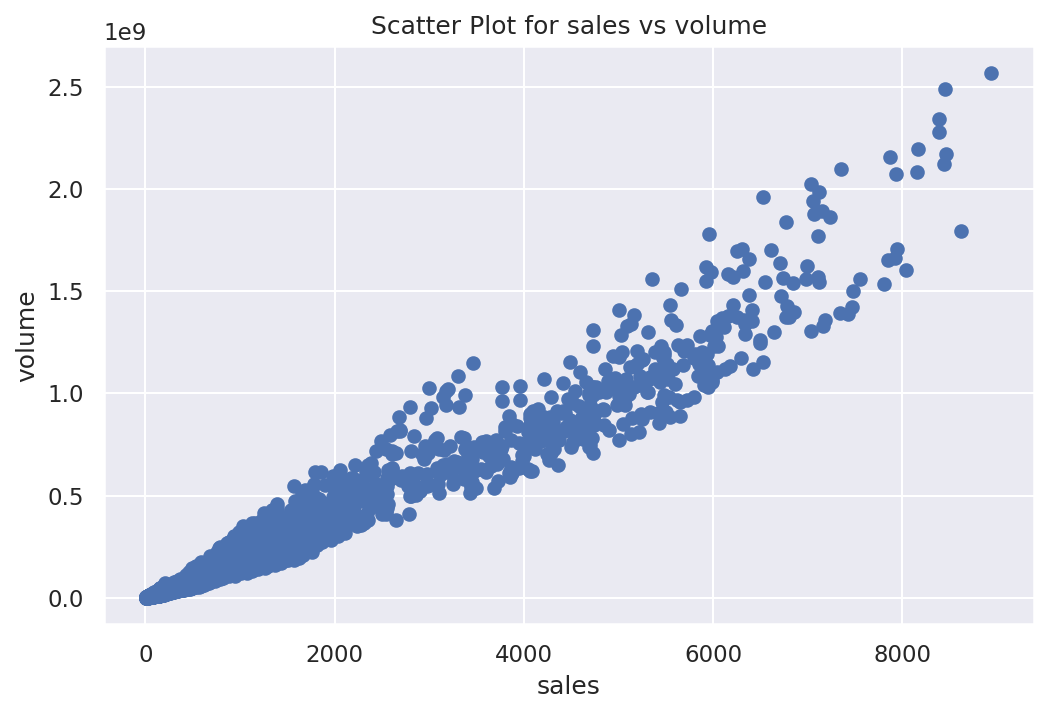

In [211]:


#1. To perform bivariate analysis on our dataset.
#Let's look at whether sales is a dependent factor for the volume of our household dataset or not
#Plot the relationship between “sales” and ”volume”
plt.scatter(dtf["sales"], dtf["volume"])
plt.title("Scatter Plot for sales vs volume")
plt.xlabel("sales")
plt.ylabel("volume")

In [212]:

#Relationshipt between two features (Positive Correlation)
dtf['sales']=dtf['sales'].fillna(0)
dtf['volume']=dtf['volume'].fillna(0)
np.corrcoef(dtf["sales"], dtf["volume"])

array([[1.        , 0.98121379],
       [0.98121379, 1.        ]])

In [213]:
#Relationshipt between two features (Negative Correlation)
dtf['sales']=dtf['sales'].fillna(0)
np.corrcoef(dtf["sales"], dtf["rownames"])

array([[ 1.        , -0.19840293],
       [-0.19840293,  1.        ]])

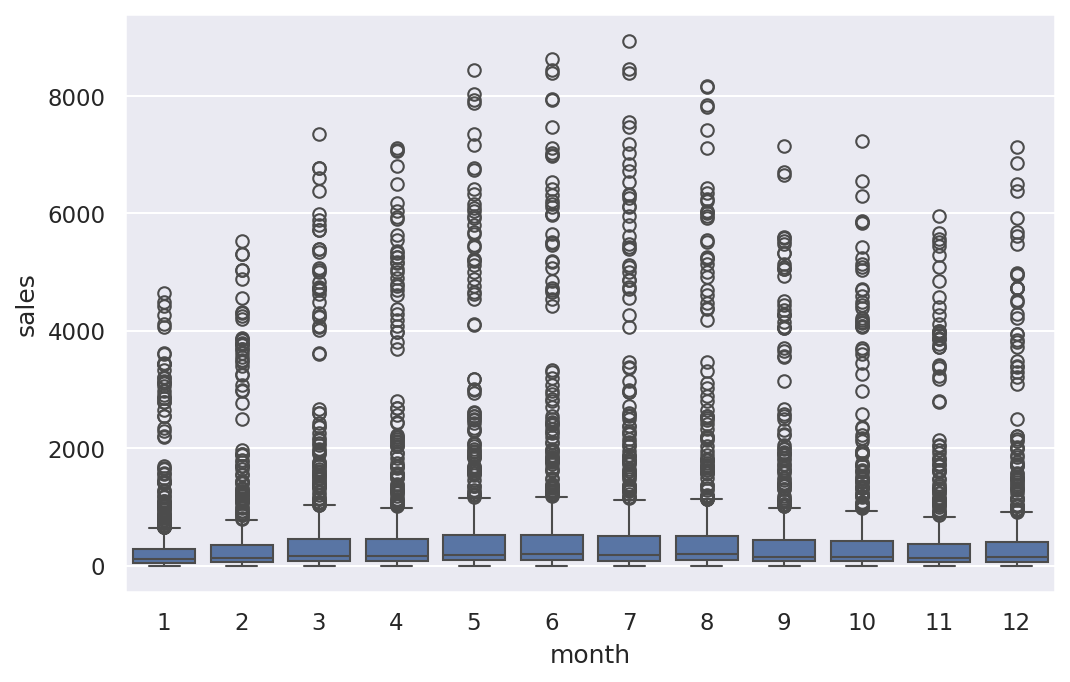

In [214]:
#2. Draw a box plot between the sales and month

sns.boxplot(x="month",y="sales",data=dtf)
plt.show()

<Axes: xlabel='month', ylabel='inventory'>

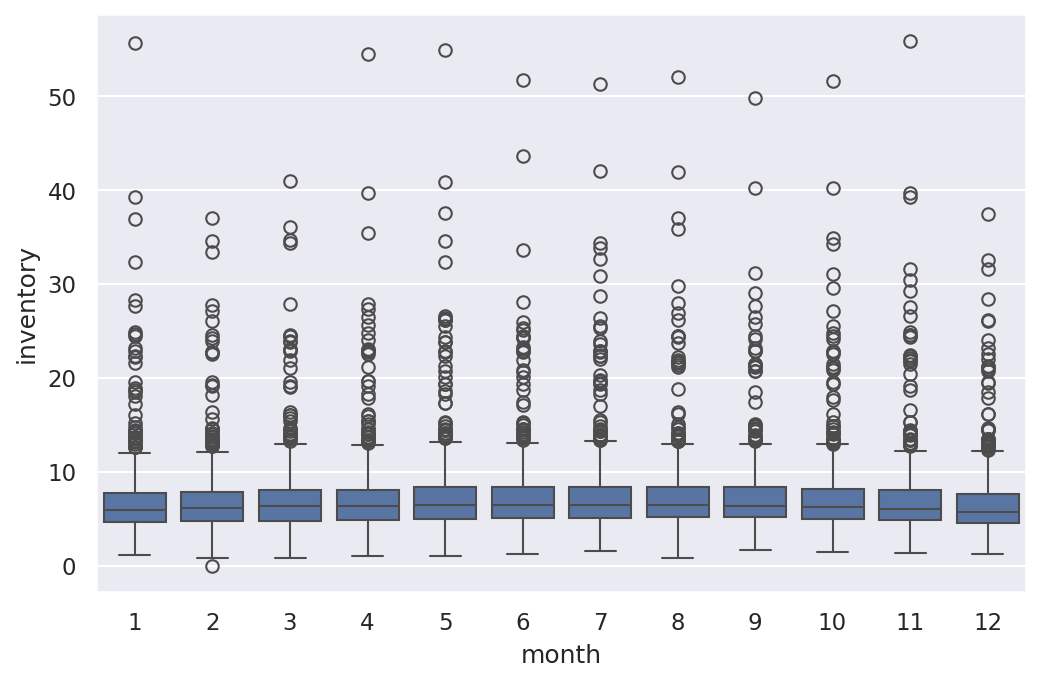

In [215]:


#3. Plot another box plot with the sales and the driver wheel type
#boxplot to visualize the distribution of "price" with types of  "drive-wheels"
sns.boxplot(x="month", y="inventory",data=dtf)



**Multivariate Analysis**


*   Multivariate analysis is the analysis of three or more variables.

*   This allows us to look at correlations (that is, how one variable changes with respect to another) and attempt to make predictions for future behavior more accurately than with bivariate analysis.

*  One common way of plotting multivariate data is to make a matrix scatter plot, known as a pair plot.
*   A matrix plot or pair plot shows each pair of variables plotted against each other.


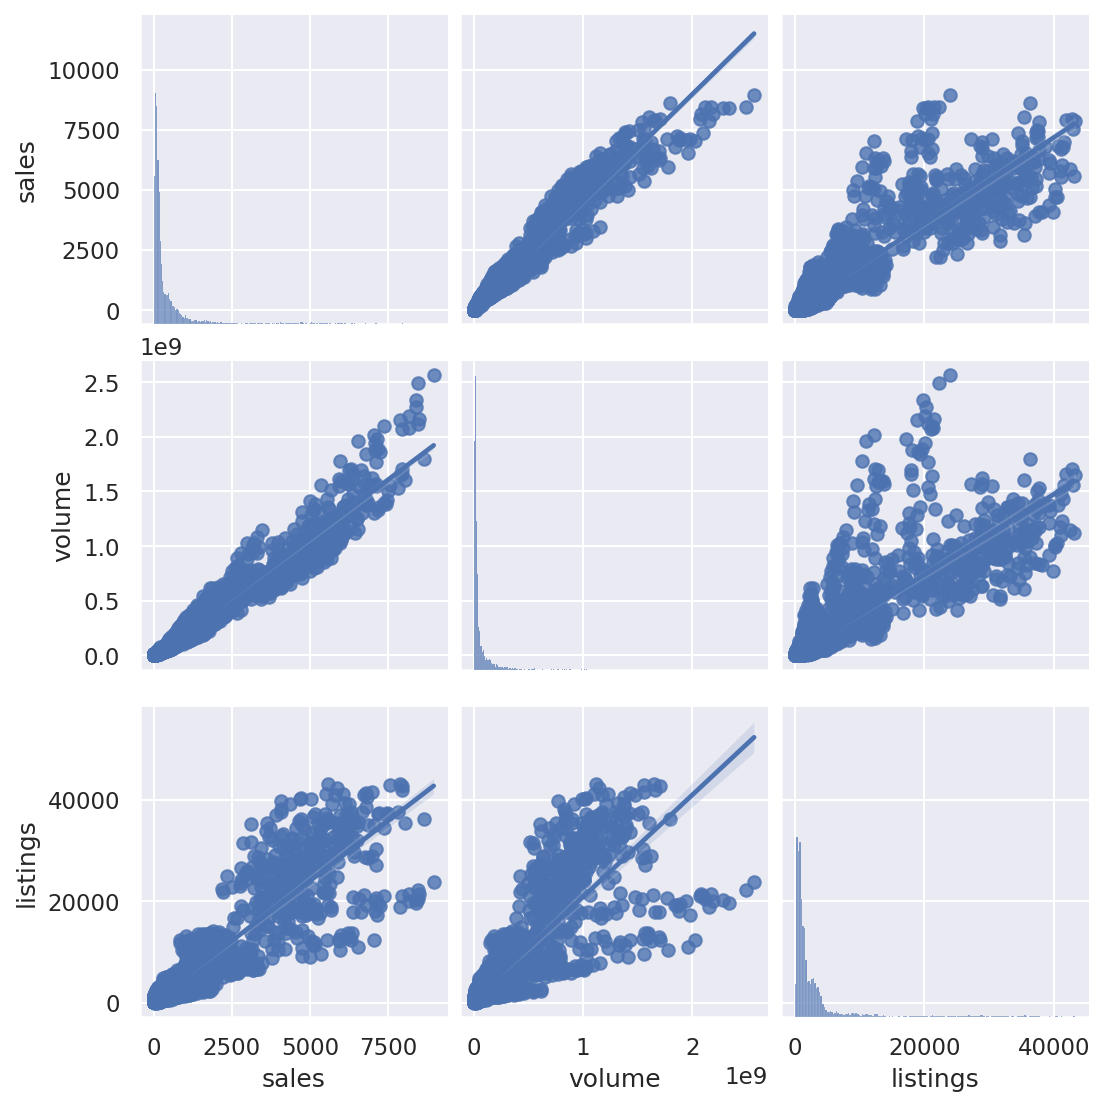

In [216]:
#1. 1. We can use the scatter_matrix() function from the pandas.tools.plotting package or
# the seaborn.pairplot() function from the seaborn package to do this:
# pair plot with plot type regression

# pair plot with plot type regression
sns.pairplot(df,vars = ['sales', 'volume','listings'], kind="reg")
plt.show()


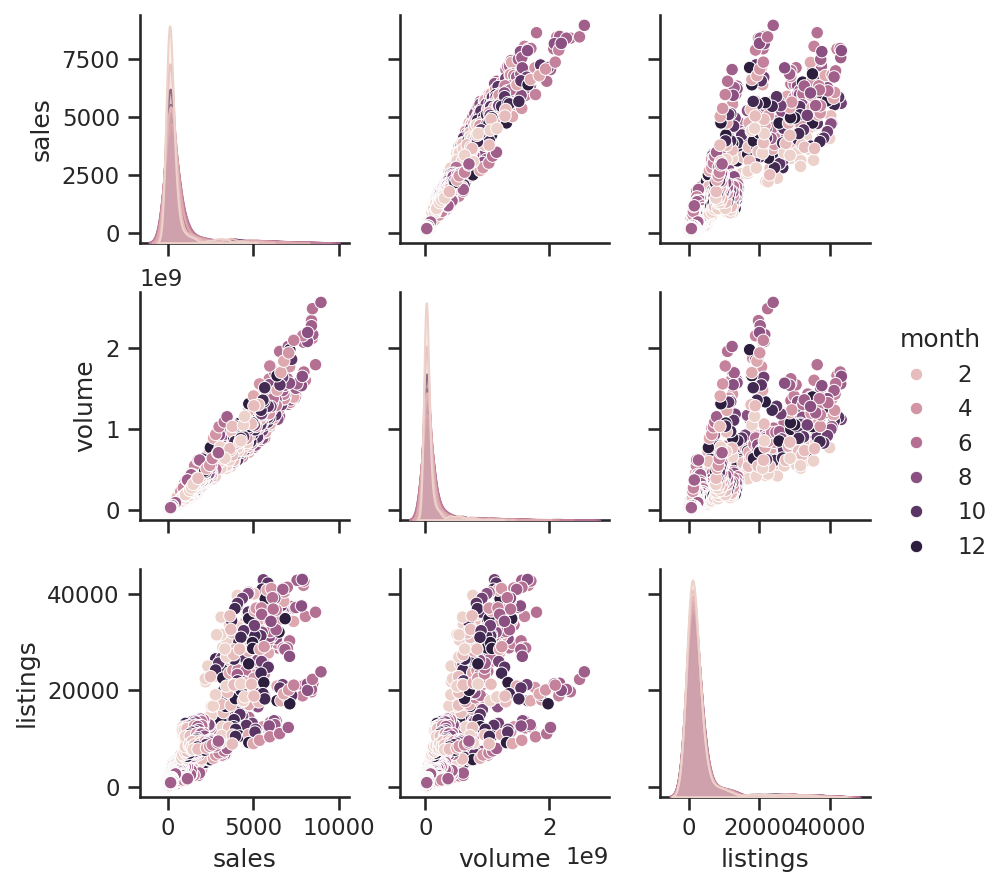

In [217]:

#2. A pair plot by specifying the colors, labels, plot type, diagonal plot type, and variables.
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['sales', 'volume','listings'], hue="month")
plt.show()


In [218]:

#The density plots on the diagonal allow us to see the distribution of a single variable,
#while the scatter plots on the upper and lower triangles show the relationship (or correlation) between two variables.
#The hue parameter is the column name used for the labels of the data points;
#in this diagram, the drivewheels type is labeled by color.
#The left-most plot in the second row shows the scatter plot of normalized-losses versus wheel-base.


In [219]:
#3. To calculate the correlation coefficient for the sales and volume,
from scipy import stats

corr = stats.pearsonr(dtf["sales"], dtf["volume"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.0
cor:		 0.9812137924655193


In [220]:
# To find the correlation among the entire numerical records
# the columns using pearson method
correlation = dtf.corr(method='pearson', numeric_only=True)
correlation

rownames      year     month     sales    volume    median  \
rownames   1.000000  0.021695  0.000374 -0.198403 -0.196247 -0.185070   
year       0.021695  1.000000 -0.046502  0.041608  0.097315  0.499707   
month      0.000374 -0.046502  1.000000  0.014423  0.015242  0.038996   
sales     -0.198403  0.041608  0.014423  1.000000  0.981214  0.345001   
volume    -0.196247  0.097315  0.015242  0.981214  1.000000  0.408361   
median    -0.185070  0.499707  0.038996  0.345001  0.408361  1.000000   
listings  -0.161183 -0.051756  0.006089  0.921468  0.860905  0.245101   
inventory  0.152642  0.097672  0.014757 -0.192857 -0.194223 -0.142189   
date       0.021739  0.997970  0.017212  0.042567  0.098378  0.502748   

           listings  inventory      date  
rownames  -0.161183   0.152642  0.021739  
year      -0.051756   0.097672  0.997970  
month      0.006089   0.014757  0.017212  
sales      0.921468  -0.192857  0.042567  
volume     0.860905  -0.194223  0.098378  
median     0.245101  -0.142189  0.502748  
listings   1.000000  -0.100157 -0.051411  
inventory -0.100157   1.000000  0.098680  
date      -0.051411   0.098680  1.000000

<Axes: >

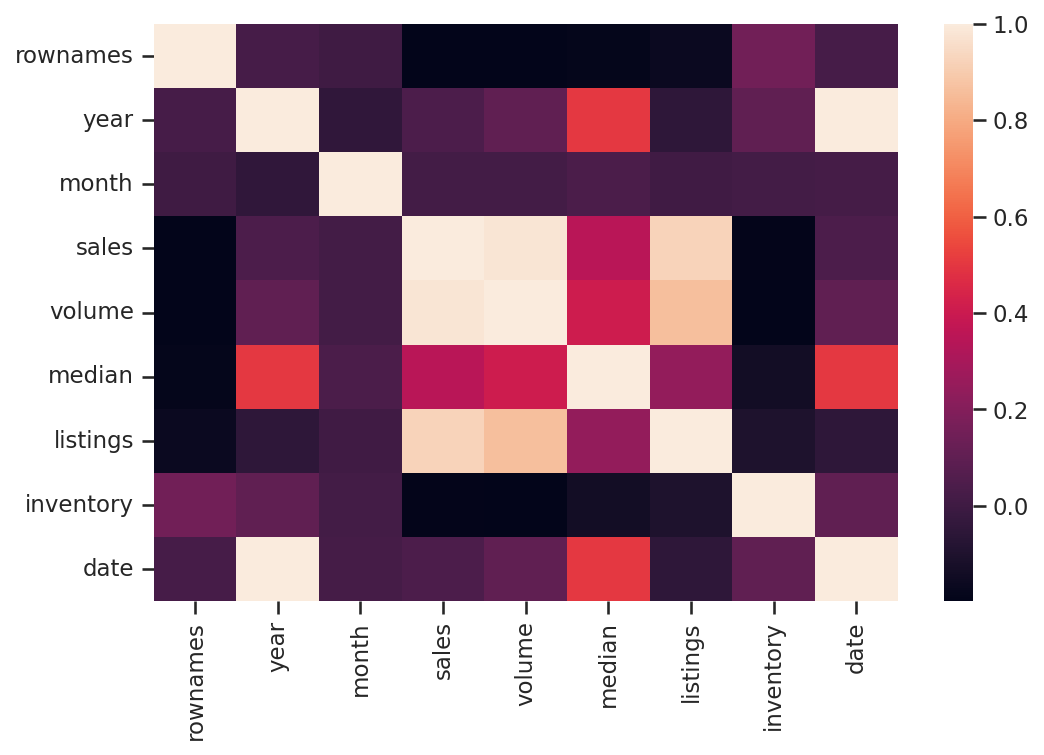

In [221]:

#5. Visualize this correlation analysis using a heatmap.
#A heatmap is the best technique to make this look beautiful and easier to interpret:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

In [222]:
#A coefficient close to 1 means that there's a very strong positive correlation between the two variables.
#The diagonal line is the correlation of the variables to themselves – so they'll, of course, be 1.

**Time Series Analysis**

*   Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time.
*   Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual.

*  Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.





**Why even analyze a time series?**

*  Because it is the preparatory step before you develop a forecast of the series.

*  Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.



**Understanding the time series dataset**


*   A time series is a collection of observations made sequentially in time.
*   There are two important key phrases here

*  a collection of observations and
*   sequentially in time.





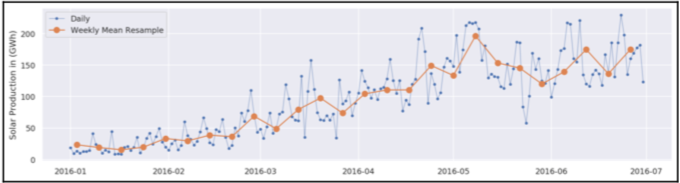

The preceding screenshot illustrates solar energy production (measured in Gigawatt Hours (GWh)) for the first six months of 2016. It also shows the consumption of electricity on both a daily and weekly basis.



**Components of TSA**


*   Time Frame (How far can we predict?)

 * short-term (1 - 2 periods)
 * medium-term (5 - 10 periods)
 * long-term (12+ periods)
 * No line of demarcation
*  Trend
  * Gradual, long-term movement (up or down) of demand.
  * Easiest to detect
* Cycle
   * An up-and-down repetitive movement in demand.
   * repeats itself over a long period of time

* Seasonal Variation
   * An up-and-down repetitive movement within a trend occurring periodically.
   * Often weather related but could be daily or weekly occurrence
* Random Variations
   * Erratic movements that are not predictable because they do not follow a pattern


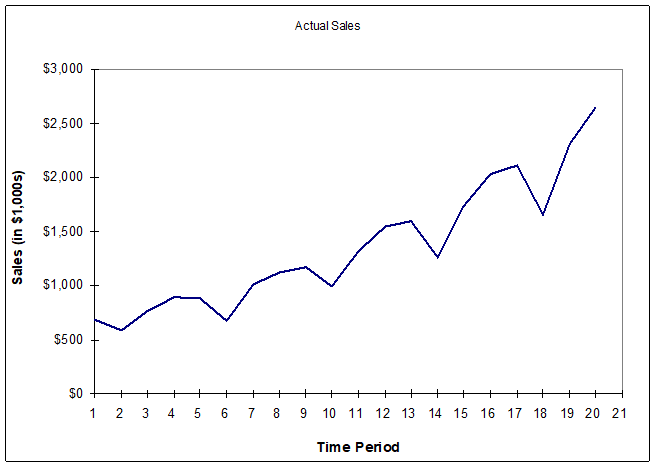

* Difficult to forecast demand because...
  * There are no causal variables
  *The components (trend, seasonality, cycles, and random variation) cannot always be easily or accurately identified

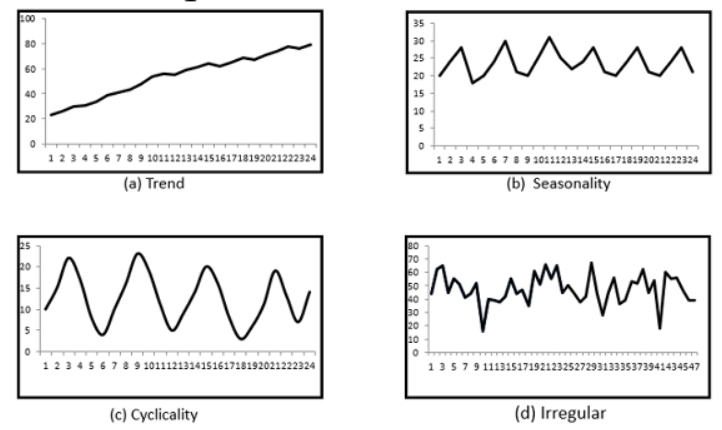

**Time Series terms**

* Stationary Data - a time series variable exhibiting no significant upward or downward trend over time.
* Nonstationary Data - a time series variable exhibiting a significant upward or downward trend over time.
* Seasonal Data - a time series variable exhibiting a repeating patterns at regular intervals over time

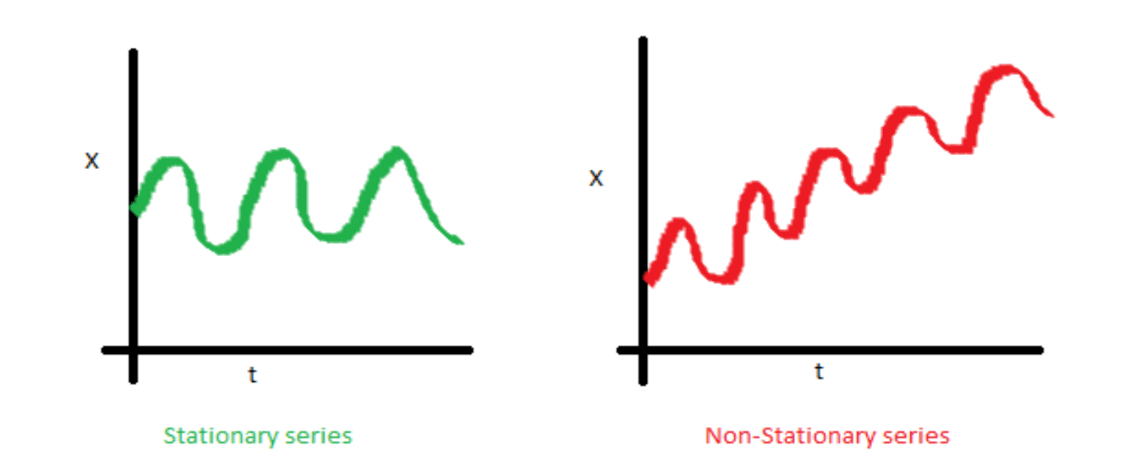

**Approaching TSA**

There are many, many different time series techniques.

* It is usually impossible to know which technique will be best for a particular data set.
* It is customary to try out several different techniques and select the one that seems to work best.
* To be an effective time series modeler, you need to keep several time series techniques in your “tool box.”


**Measuring accuracy**
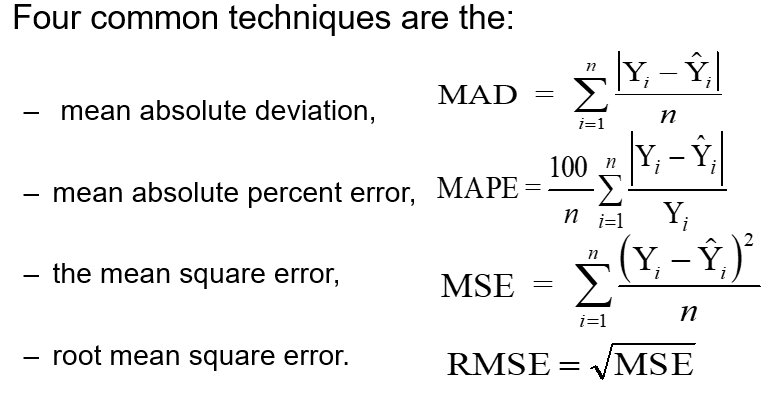


**Fundamentals of TSA**

In [223]:
#1. We can generate the dataset using the numpy library:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
zero_mean_series

array([ 0.47788285,  1.48119807,  0.23726911,  0.73618566, -0.51259143,
       -0.76133265,  0.09337524, -0.10051114, -1.71688079, -0.6746168 ,
       -0.42704327, -1.66228727, -0.68705794,  0.2890729 , -2.13092573,
        0.15061436,  1.07541429, -0.0689912 ,  1.23934275,  0.93339229,
       -1.0233496 , -0.356794  , -1.16244301,  0.66127883,  0.23634217,
        0.90702345,  0.99502154,  1.69242318, -1.29920581, -1.97916513,
        1.72188241, -0.25227257,  0.79521801,  1.13536179, -1.96632066,
        0.31575103, -0.00822342, -0.08345676, -0.54838888,  0.57391432,
        0.23137126, -0.84984732,  0.94522473, -1.47584759, -0.73786322,
       -0.07781775,  0.04802875,  0.52954597,  0.4688301 , -0.21421392])

In [224]:
#Parameters:
#loc
#    float or array_like of floats
#    Mean (“centre”) of the distribution.
#scale
#    float or array_like of floats
#    Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#size
#    int or tuple of ints, optional
#    Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars.
#    Otherwise, np.broadcast(loc, scale).size samples are drawn.

#Returns:
#   out:     ndarray or scalar


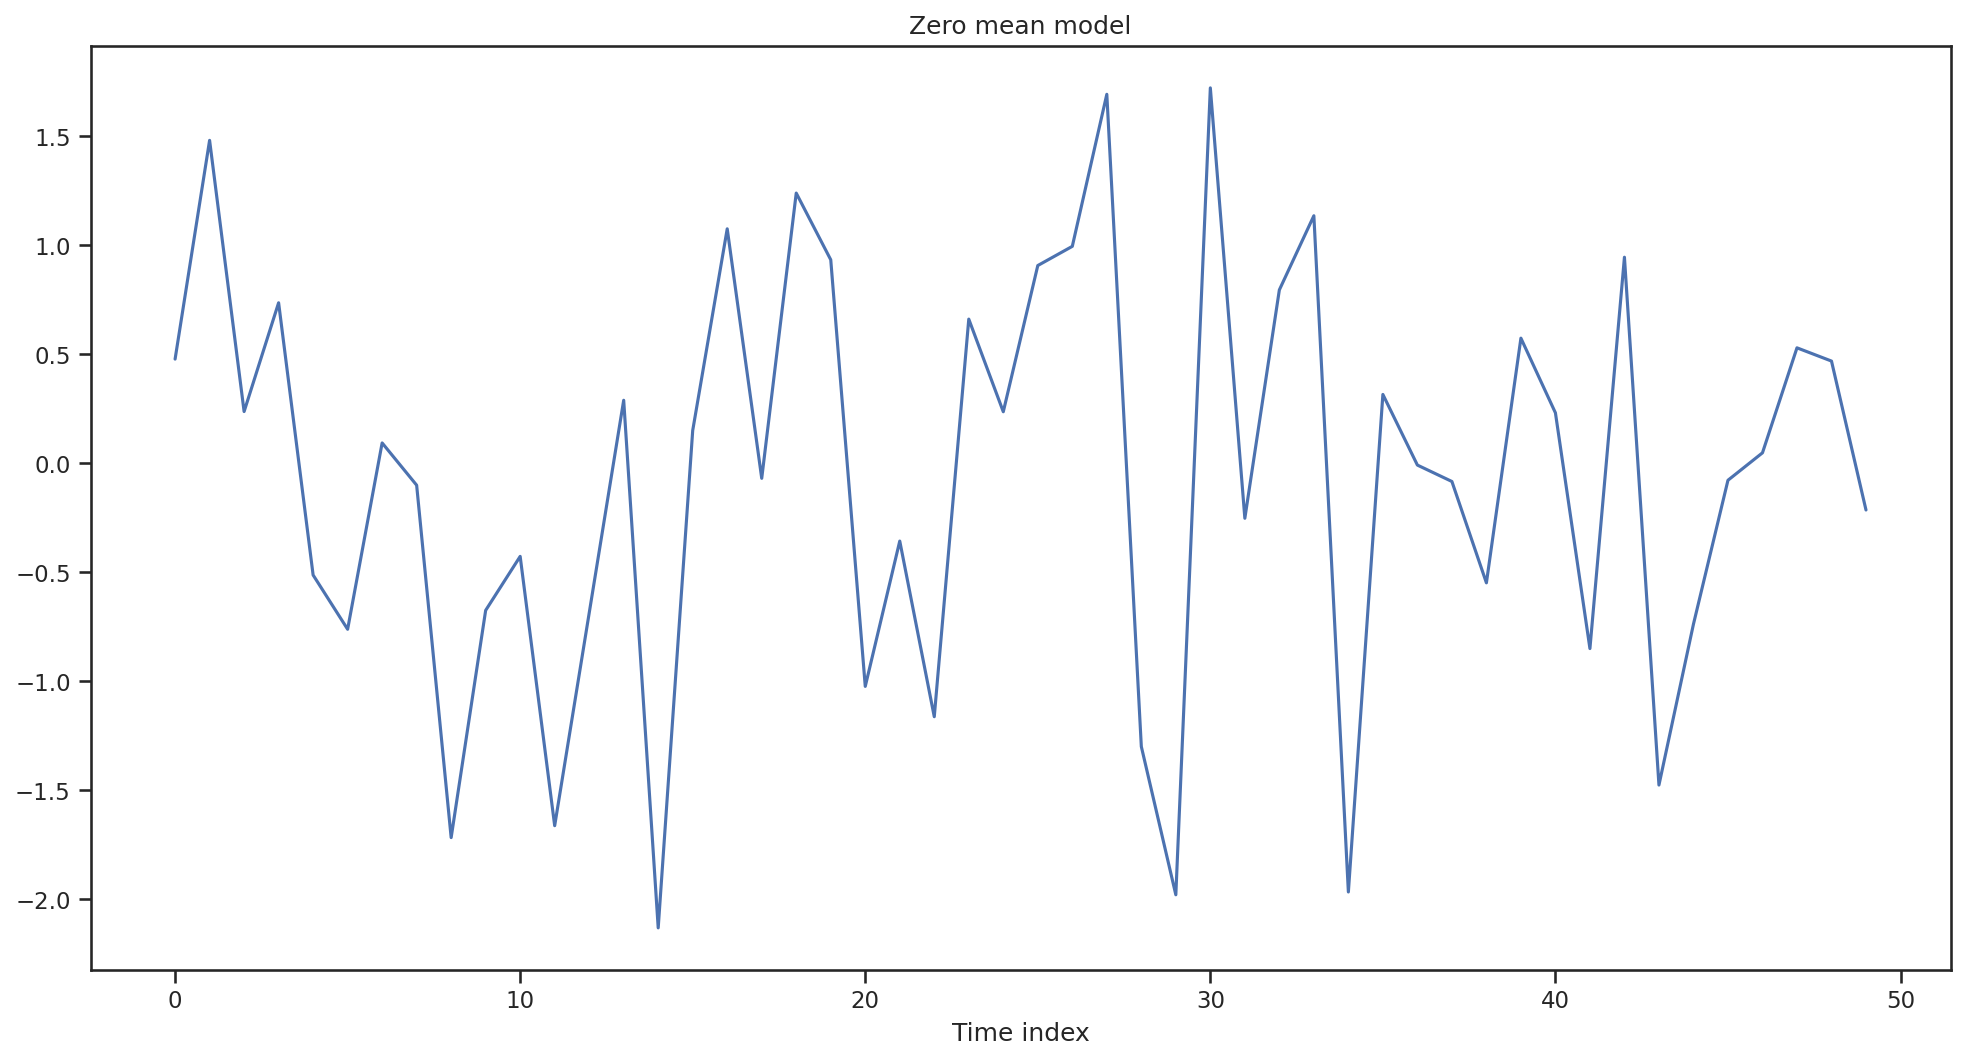

In [225]:
#2. Next, we are going to use the seaborn library to plot the time series data.
#Check the code snippet given here:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.show()

In [226]:
#We can perform a cumulative sum over the list and then plot the data using a time series plot.
#The plot gives more interesting results. Check the following code snippet:
random_walk = np.cumsum(zero_mean_series)
random_walk

array([ 0.47788285,  1.95908093,  2.19635004,  2.9325357 ,  2.41994427,
        1.65861162,  1.75198686,  1.65147572, -0.06540507, -0.74002187,
       -1.16706514, -2.82935241, -3.51641034, -3.22733745, -5.35826318,
       -5.20764882, -4.13223453, -4.20122572, -2.96188297, -2.02849068,
       -3.05184027, -3.40863427, -4.57107728, -3.90979844, -3.67345628,
       -2.76643283, -1.77141128, -0.0789881 , -1.37819391, -3.35735904,
       -1.63547664, -1.88774921, -1.0925312 ,  0.04283059, -1.92349007,
       -1.60773904, -1.61596246, -1.69941922, -2.24780809, -1.67389377,
       -1.44252252, -2.29236984, -1.3471451 , -2.8229927 , -3.56085592,
       -3.63867367, -3.59064492, -3.06109895, -2.59226885, -2.80648277])

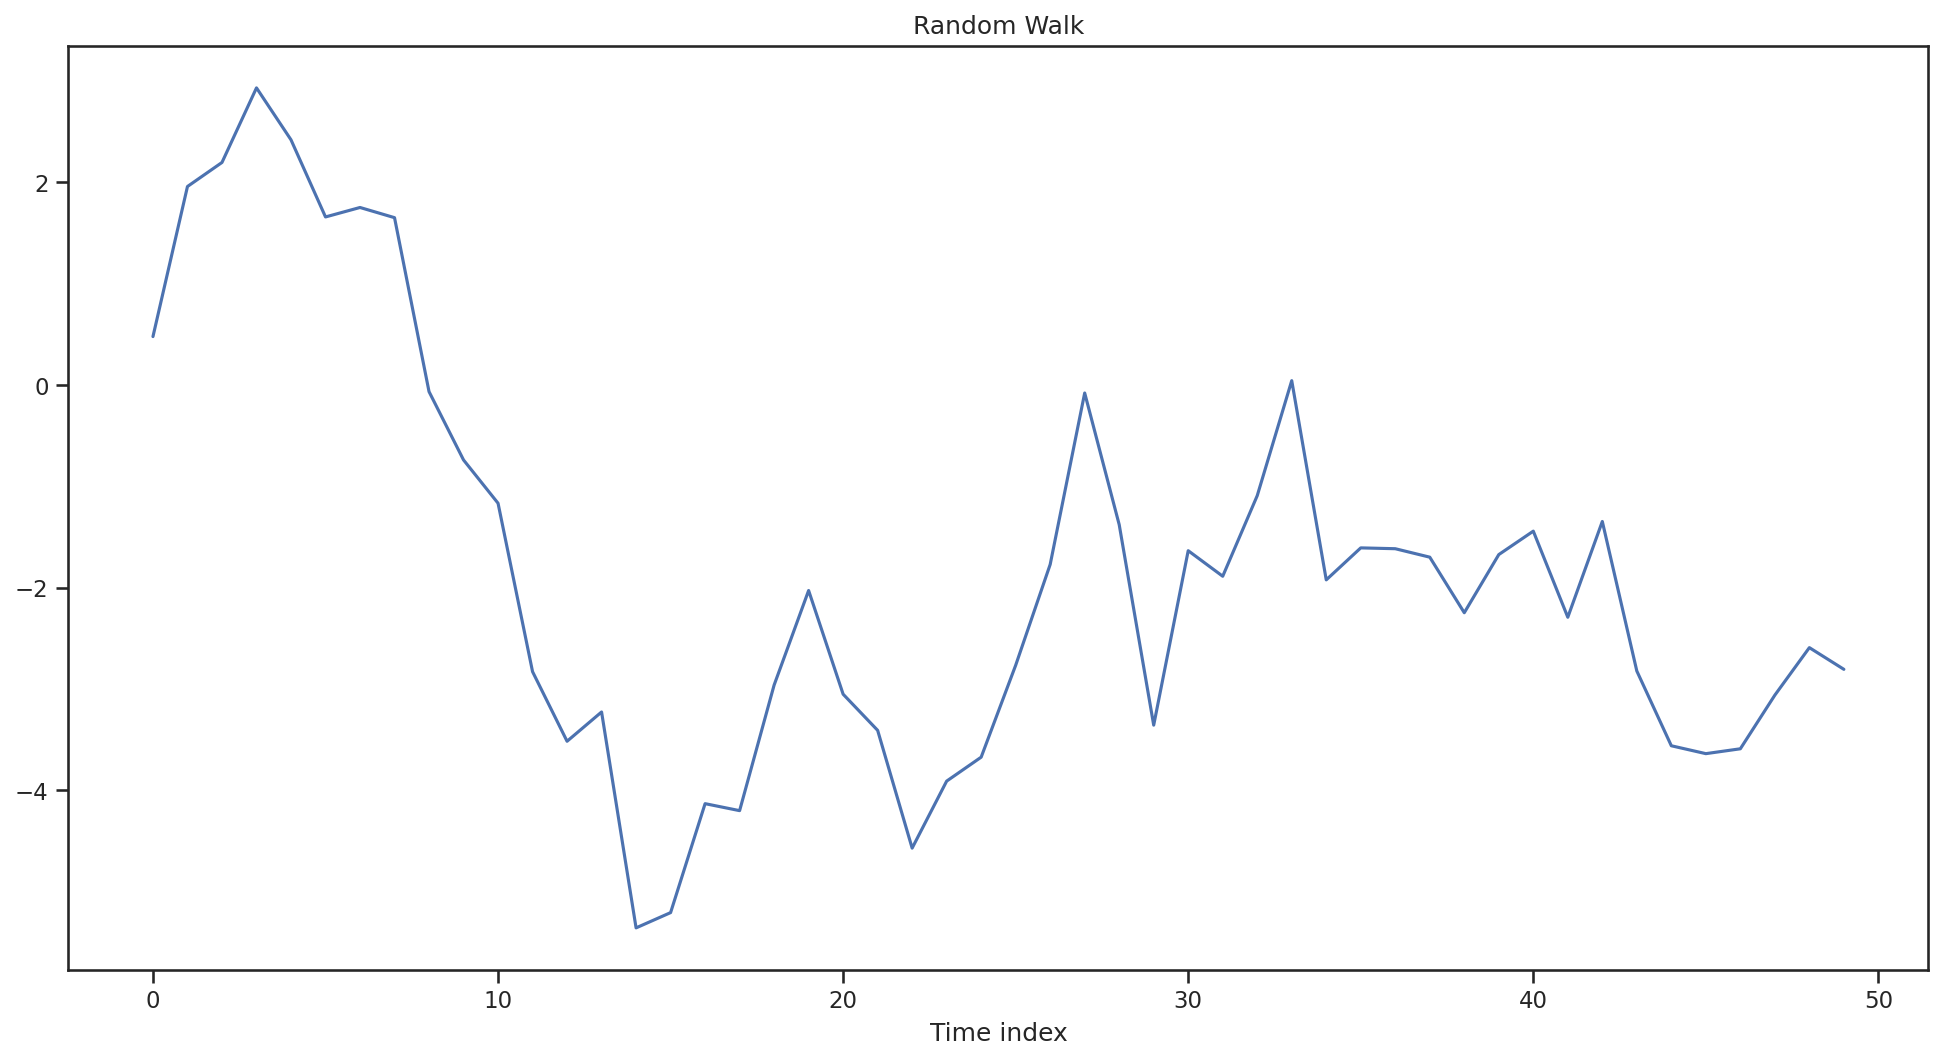

In [227]:
#4. Now, if we plot the list using the time series plot as shown here, we get an interesting graph that shows the change in values over time:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()

When working with time series data, there are several unique characteristics that can be observed. In general, time series tend to exhibit the following characteristics:

* When looking at time series data, it is essential to see if there is any trend. Observing a trend means that the average measurement values seem either to decrease or increase over time.
* Time series data may contain a notable amount of outliers. These outliers can be noted when plotted on a graph.

* Some data in time series tends to repeat over a certain interval in some patterns. We refer to such repeating patterns as seasonality.

* Sometimes, there is an uneven change in time series data. We refer to such uneven changes as abrupt changes. Observing abrupt changes in time series is essential as it reveals essential underlying phenomena.

* Some series tend to follow constant variance over time. Hence, it is essential to look at the time series data and see whether or not the data exhibits constant variance over time.


**TSA with Open Power System Data**

In [228]:
dtf.columns

Index(['rownames', 'city', 'year', 'month', 'sales', 'volume', 'median',
       'listings', 'inventory', 'date'],
      dtype='object')

In [229]:
dtf.head(10)

rownames     city  year  month  sales      volume   median  listings  \
0         1  Abilene  2000      1   72.0   5380000.0  71400.0     701.0   
1         2  Abilene  2000      2   98.0   6505000.0  58700.0     746.0   
2         3  Abilene  2000      3  130.0   9285000.0  58100.0     784.0   
3         4  Abilene  2000      4   98.0   9730000.0  68600.0     785.0   
4         5  Abilene  2000      5  141.0  10590000.0  67300.0     794.0   
5         6  Abilene  2000      6  156.0  13910000.0  66900.0     780.0   
6         7  Abilene  2000      7  152.0  12635000.0  73500.0     742.0   
7         8  Abilene  2000      8  131.0  10710000.0  75000.0     765.0   
8         9  Abilene  2000      9  104.0   7615000.0  64500.0     771.0   
9        10  Abilene  2000     10  101.0   7040000.0  59300.0     764.0   

   inventory         date  
0        6.3  2000.000000  
1        6.6  2000.083333  
2        6.8  2000.166667  
3        6.9  2000.250000  
4        6.8  2000.333333  
5        6.6  2000.416667  
6        6.2  2000.500000  
7        6.4  2000.583333  
8        6.5  2000.666667  
9        6.6  2000.750000

In [230]:
#1. Check the shape of the dataset:
dtf.shape

(8602, 10)

In [231]:
#2. Check few entries inside the dataframe.
#print(dtf.tail(10))
print(dtf.head())

   rownames     city  year  month  sales      volume   median  listings  \
0         1  Abilene  2000      1   72.0   5380000.0  71400.0     701.0   
1         2  Abilene  2000      2   98.0   6505000.0  58700.0     746.0   
2         3  Abilene  2000      3  130.0   9285000.0  58100.0     784.0   
3         4  Abilene  2000      4   98.0   9730000.0  68600.0     785.0   
4         5  Abilene  2000      5  141.0  10590000.0  67300.0     794.0   

   inventory         date  
0        6.3  2000.000000  
1        6.6  2000.083333  
2        6.8  2000.166667  
3        6.9  2000.250000  
4        6.8  2000.333333  


In [232]:
#3. The data types of each column in our dtf dataframe:
dtf.dtypes

rownames       int64
city          object
year           int64
month          int64
sales        float64
volume       float64
median       float64
listings     float64
inventory    float64
date         float64
dtype: object

In [233]:
# Generate random days between 1 and 28 (to avoid invalid dates)
dtf['day'] = np.random.randint(1, 29, size=len(dtf))

# Convert to datetime
dtf['date'] = pd.to_datetime(dtf[['year', 'month', 'day']])
dtf.dtypes

rownames              int64
city                 object
year                  int64
month                 int64
sales               float64
volume              float64
median              float64
listings            float64
inventory           float64
date         datetime64[ns]
day                   int64
dtype: object

In [234]:

#6. Let's next change the index of our dataframe to the Date column
dtf = dtf.set_index('date')
dtf.tail(3)

rownames           city  year  month  sales      volume    median  \
date                                                                            
2015-05-14      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
2015-06-14      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
2015-07-22      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

            listings  inventory  day  
date                                  
2015-05-14     776.0        6.4   14  
2015-06-14     770.0        6.2   14  
2015-07-22     811.0        6.5   22

In [235]:
dtf.index

DatetimeIndex(['2000-01-09', '2000-02-02', '2000-03-18', '2000-04-13',
               '2000-05-20', '2000-06-03', '2000-07-26', '2000-08-06',
               '2000-09-20', '2000-10-18',
               ...
               '2014-10-05', '2014-11-20', '2014-12-16', '2015-01-28',
               '2015-02-03', '2015-03-10', '2015-04-23', '2015-05-14',
               '2015-06-14', '2015-07-22'],
              dtype='datetime64[ns]', name='date', length=8602, freq=None)

In [236]:

#8. Since our index is the DatetimeIndex object, now we can use it to analyze the dataframe. Let's add more columns to our dataframe to make our lives easier. Let's add Year, Month, and Weekday Name:
# Add columns with year, month, and weekday name
dtf['Weekday Name'] = dtf.index.day_name()

In [237]:
dtf.tail(10)

rownames           city  year  month  sales      volume    median  \
date                                                                            
2014-10-05      8593  Wichita Falls  2014     10  112.0  13817043.0  113300.0   
2014-11-20      8594  Wichita Falls  2014     11   96.0  11308302.0  108000.0   
2014-12-16      8595  Wichita Falls  2014     12  109.0  13883668.0  103800.0   
2015-01-28      8596  Wichita Falls  2015      1   71.0   7519961.0   82100.0   
2015-02-03      8597  Wichita Falls  2015      2  100.0  11646765.0   94000.0   
2015-03-10      8598  Wichita Falls  2015      3  152.0  16716584.0   89200.0   
2015-04-23      8599  Wichita Falls  2015      4  129.0  15482194.0  105300.0   
2015-05-14      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
2015-06-14      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
2015-07-22      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

            listings  inventory  day Weekday Name  
date                                               
2014-10-05     905.0        7.8    5       Sunday  
2014-11-20     870.0        7.5   20     Thursday  
2014-12-16     821.0        7.0   16      Tuesday  
2015-01-28     829.0        7.2   28    Wednesday  
2015-02-03     795.0        6.8    3      Tuesday  
2015-03-10     818.0        6.8   10      Tuesday  
2015-04-23     760.0        6.4   23     Thursday  
2015-05-14     776.0        6.4   14     Thursday  
2015-06-14     770.0        6.2   14       Sunday  
2015-07-22     811.0        6.5   22    Wednesday

In [238]:
#9. Let's display five random rows from the dataframe:
# Display a random sampling of 5 rows
dtf.sample(5, random_state=0)

rownames               city  year  month  sales      volume  \
date                                                                      
2008-12-16      4222  Killeen-Fort Hood  2008     12  217.0  27480000.0   
2013-04-11      3152          Galveston  2013      4   88.0  22056185.0   
2011-09-13       141            Abilene  2011      9  138.0  19329727.0   
2006-12-14      6255              Paris  2006     12   35.0   4535000.0   
2002-01-25      7505      Temple-Belton  2002      1   74.0   8925000.0   

              median  listings  inventory  day Weekday Name  
date                                                         
2008-12-16  114900.0    1407.0        6.2   16      Tuesday  
2013-04-11  216700.0     877.0       10.5   11     Thursday  
2011-09-13  121400.0     763.0        5.5   13      Tuesday  
2006-12-14   95000.0     209.0        4.7   14     Thursday  
2002-01-25   95000.0     584.0        6.1   25       Friday

**Time-based indexing**

In [239]:
#Time-based indexing is a very powerful method of the pandas library when it comes to time series data.
#Having time-based indexing allows using a formatted string to select data.
dtf.loc['2011-09-01']


rownames               city  year  month  sales       volume  \
date                                                                       
2011-09-01      5564  Montgomery County  2011      9  532.0  133664849.0   
2011-09-01      6312              Paris  2011      9   26.0    2746600.0   
2011-09-01      7995              Tyler  2011      9  258.0   40883470.0   

              median  listings  inventory  day Weekday Name  
date                                                         
2011-09-01  177000.0    3525.0        6.9    1     Thursday  
2011-09-01  106700.0     361.0       14.3    1     Thursday  
2011-09-01  133300.0    3094.0       13.3    1     Thursday


**Visualizing time series**

In [240]:
#1. The first step is to import the seaborn and matplotlib libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)}) #Runtime Configuration
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

<Axes: xlabel='date'>

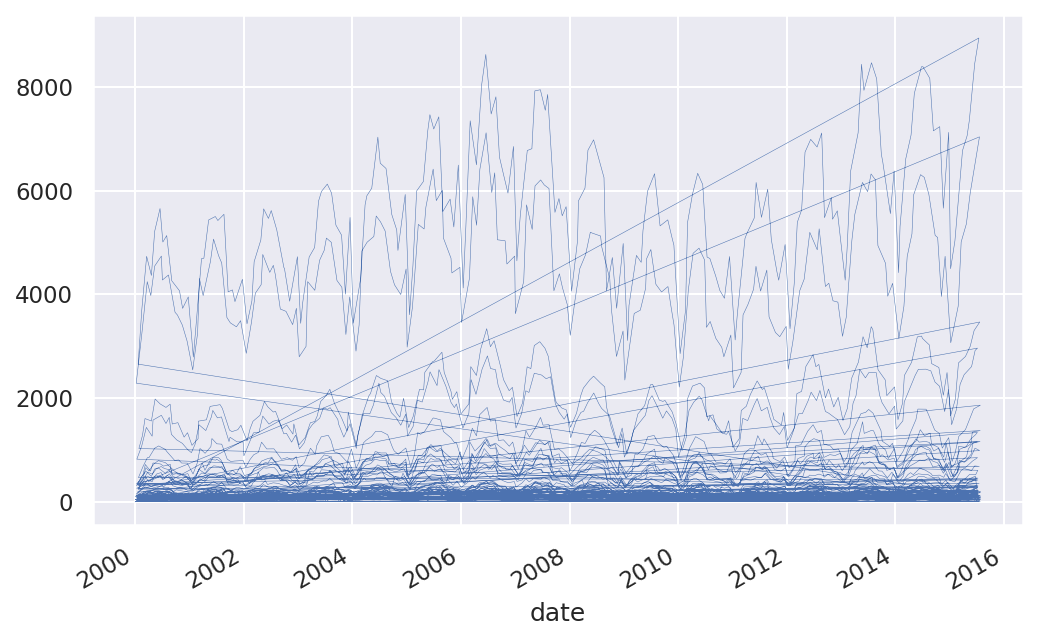

In [241]:

#2. Next, let's generate a line plot of the full time series of Germany's daily electricity consumption:
dtf['sales'].plot(linewidth=0.25)

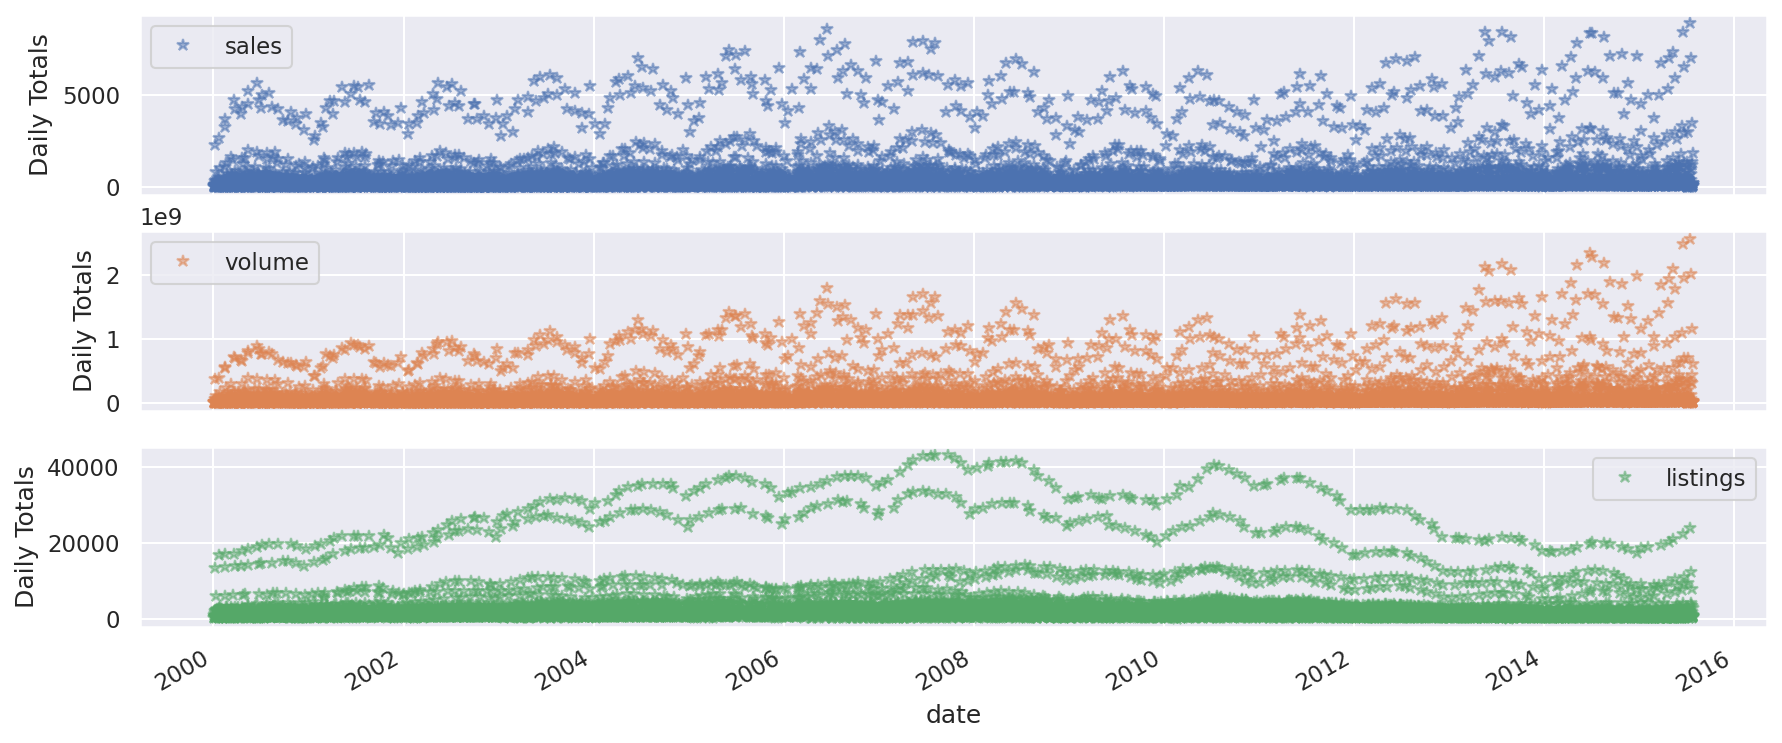

In [242]:

#3. Let's use the dots to plot the data for all the other columns:
cols_to_plot = ['sales','volume','listings']
axes = dtf[cols_to_plot].plot(marker='*', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)   #True for subplots
for ax in axes:
  ax.set_ylabel('Daily Totals')

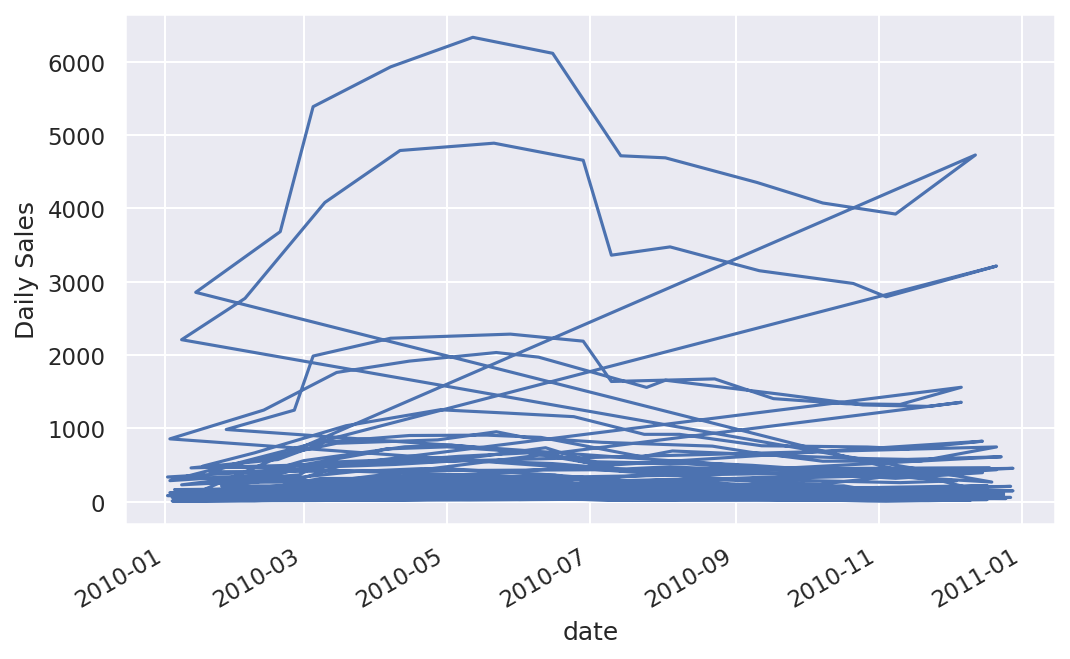

In [243]:
#4. We can further investigate a single year to have a closer look. Check the code given here:
ax = dtf.loc['2010', 'sales'].plot()
ax.set_ylabel('Daily Sales');


In [244]:
# Reset the index to avoid duplicates causing issues
dtf = dtf.reset_index()

# Or drop the duplicates (if not needed)
dtf = dtf.drop_duplicates()


In [253]:
dtf = dtf.set_index('date')  # Ensure the 'date' column is set as the index


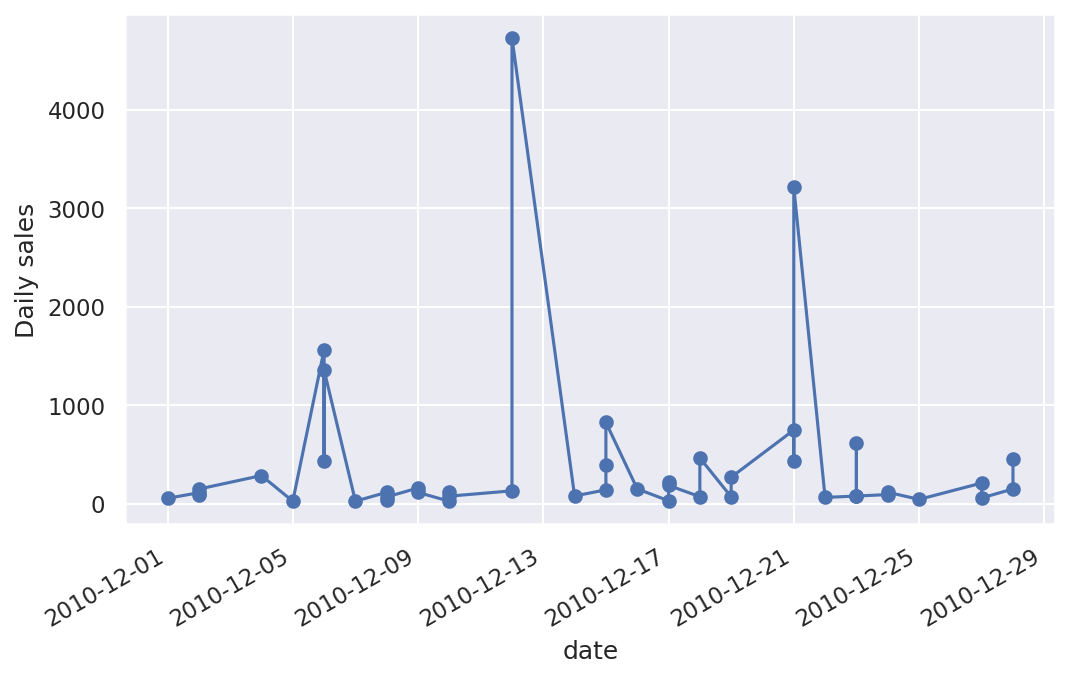

In [257]:
#Let's examine the month of December 2016 with the following code block:
ax = dtf.loc['2010-12', 'sales'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily sales');


 **Grouping time series data**

Text(0, 0.5, 'Daily sales')

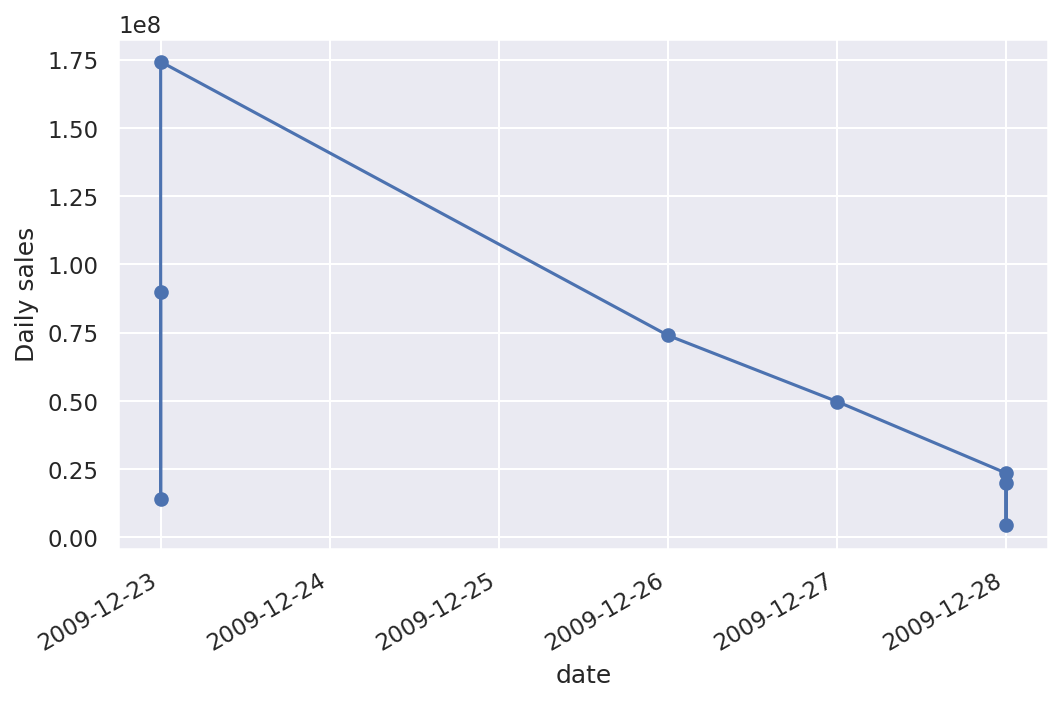

In [258]:
#In order to indicate a particular week of December, we can supply a specific date range as shown here:
dtf = dtf.sort_values(by='date')  # Sort by date
ax = dtf.loc['2009-12-23':'2009-12-30', 'volume'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily sales')

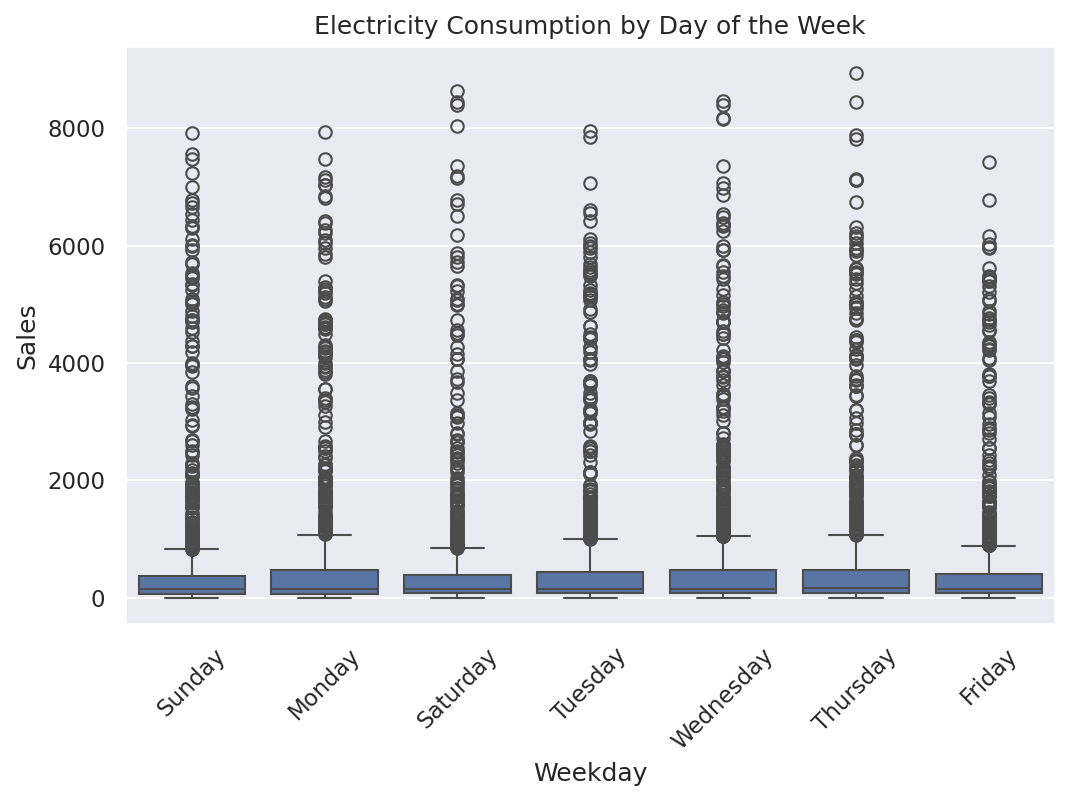

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot for sales by weekday
sns.boxplot(data=dtf, x='Weekday Name', y='sales')
plt.title('Electricity Consumption by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.show()




**Resampling time series data**

In [121]:


#1. We can use the code given here to resample our data:
columns = ['sales', 'volume', 'inventory', 'listings']
weekly_mean = dtf[columns].resample('W').mean()
weekly_mean

sales        volume  inventory     listings
date                                                         
2000-01-02    53.000000  4.075000e+06   6.500000   479.500000
2000-01-09   439.200000  6.390912e+07   4.740000  2858.100000
2000-01-16   380.625000  5.187504e+07   6.528571  2963.714286
2000-01-23   147.250000  1.685146e+07   8.457143  1287.000000
2000-01-30   269.000000  4.217041e+07   5.954545  1516.636364
...                 ...           ...        ...          ...
2015-07-05  1425.833333  3.799509e+08   9.440000  4335.600000
2015-07-12   436.000000  1.146097e+08   6.825000  1847.250000
2015-07-19   605.076923  1.431749e+08   4.458333  1655.250000
2015-07-26  1303.818182  3.630605e+08   4.890909  3484.545455
2015-08-02   857.333333  2.525766e+08   6.516667  2023.000000

[814 rows x 4 columns]

In [250]:


#2. Let's see the last six months of 2016. Let's start by initializing the variable:
start, end = '2010-01-01', '2010-06-01'


In [251]:
dtf = dtf.sort_values(by='date')

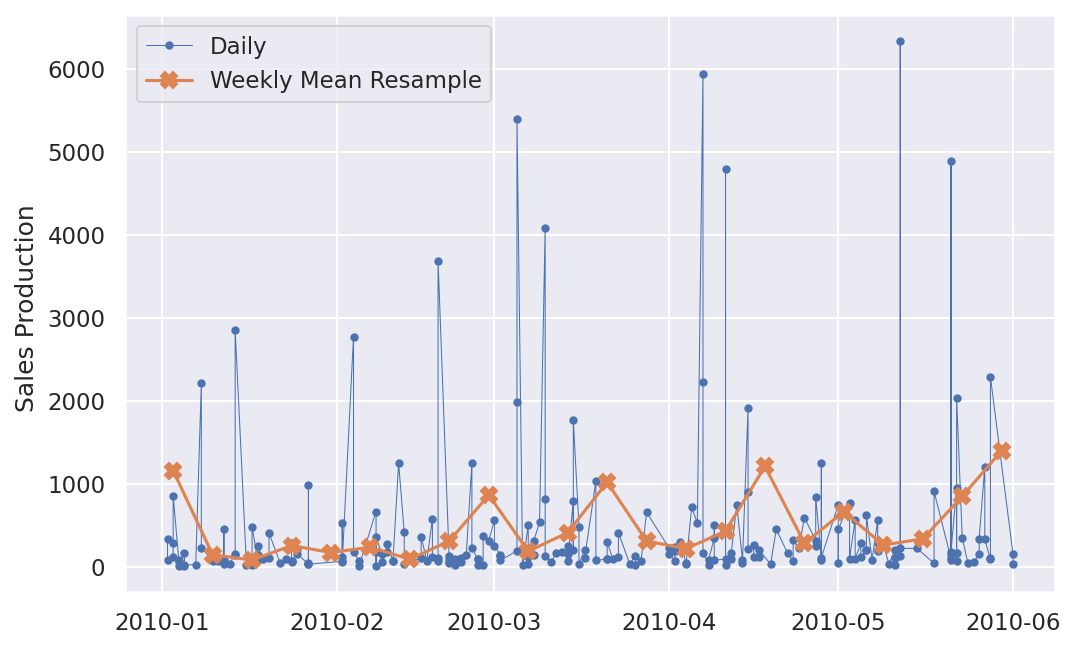

In [259]:
#3. Next, let's plot the graph using the code given here:

fig, ax = plt.subplots()
ax.plot(dtf.loc[start:end, 'sales'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(weekly_mean.loc[start:end, 'sales'], marker='X', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Sales Production ')
ax.legend();



**Module 4**

1D Analysis

In [ ]:
#Load the necessary package for 1D analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [67]:
dff=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv')


In [70]:
num_col = "sales"

In [71]:
# Calculate summary statistics
mean_val = dff[num_col].mean()
median_val = dff[num_col].median()
mode_val = dff[num_col].mode().values[0]
skewness_val = dff[num_col].skew()
kurtosis_val = dff[num_col].kurt()


In [72]:
# Print summary statistics
print("Summary Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Skewness: {skewness_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

Summary Statistics:
Mean: 549.56
Median: 169.00
Mode: 68.00
Skewness: 3.89
Kurtosis: 16.44


<ipython-input-73-0d41245392bc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff[num_col], kde=False, rug=True)


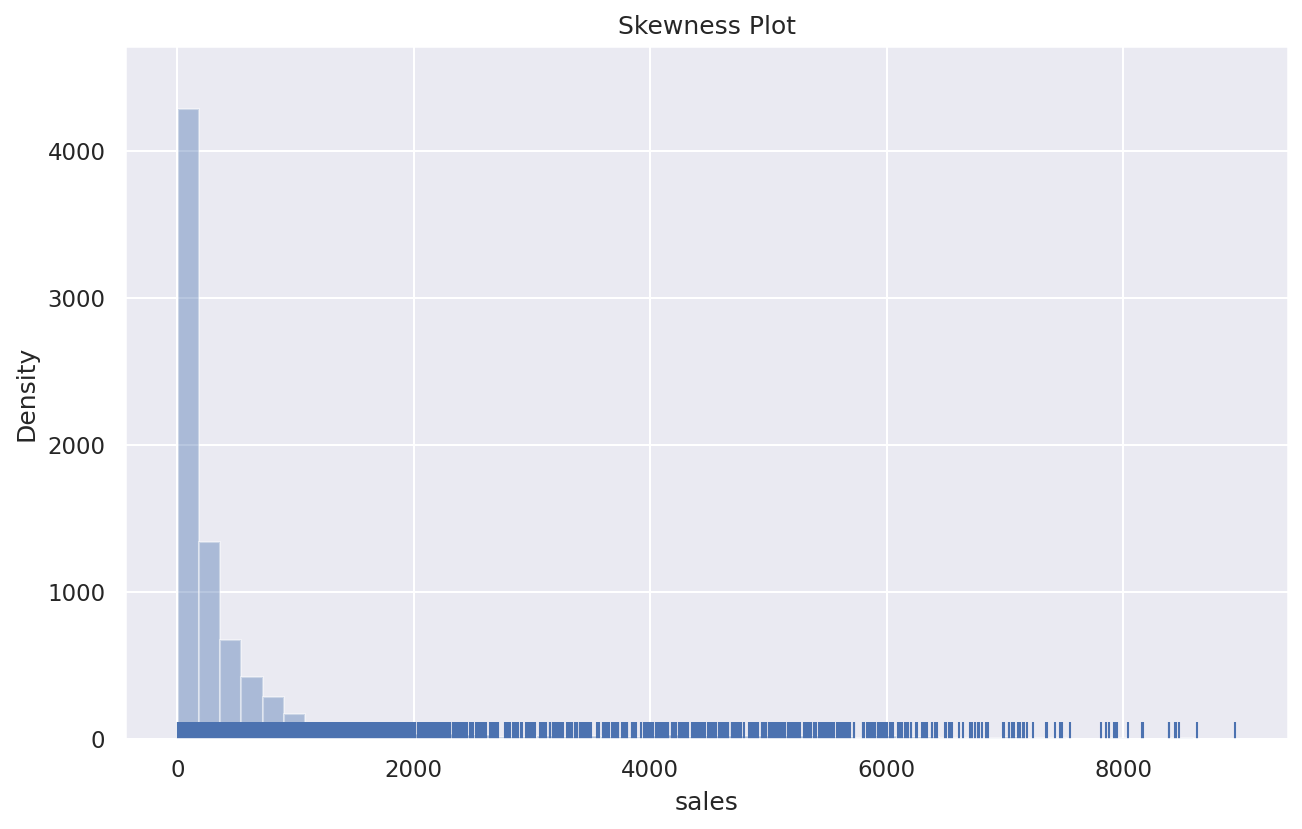

In [73]:
# Create a skewness plot
plt.figure(figsize=(10, 6))
sns.distplot(dff[num_col], kde=False, rug=True)
plt.title("Skewness Plot")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()


<ipython-input-74-3860d64d62ab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dff[num_col], shade=True)


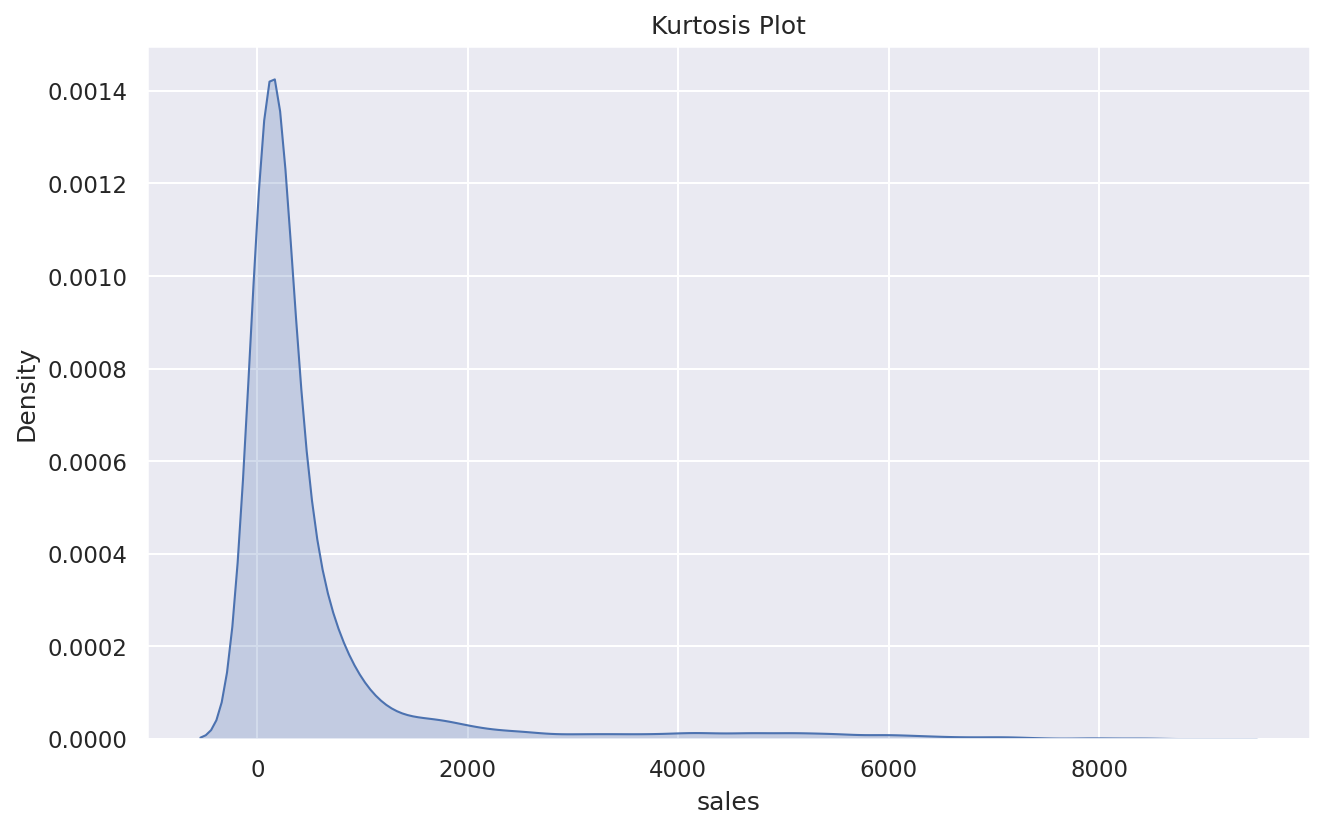

In [74]:


# Create a kurtosis plot
plt.figure(figsize=(10, 6))
sns.kdeplot(dff[num_col], shade=True)
plt.title("Kurtosis Plot")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()


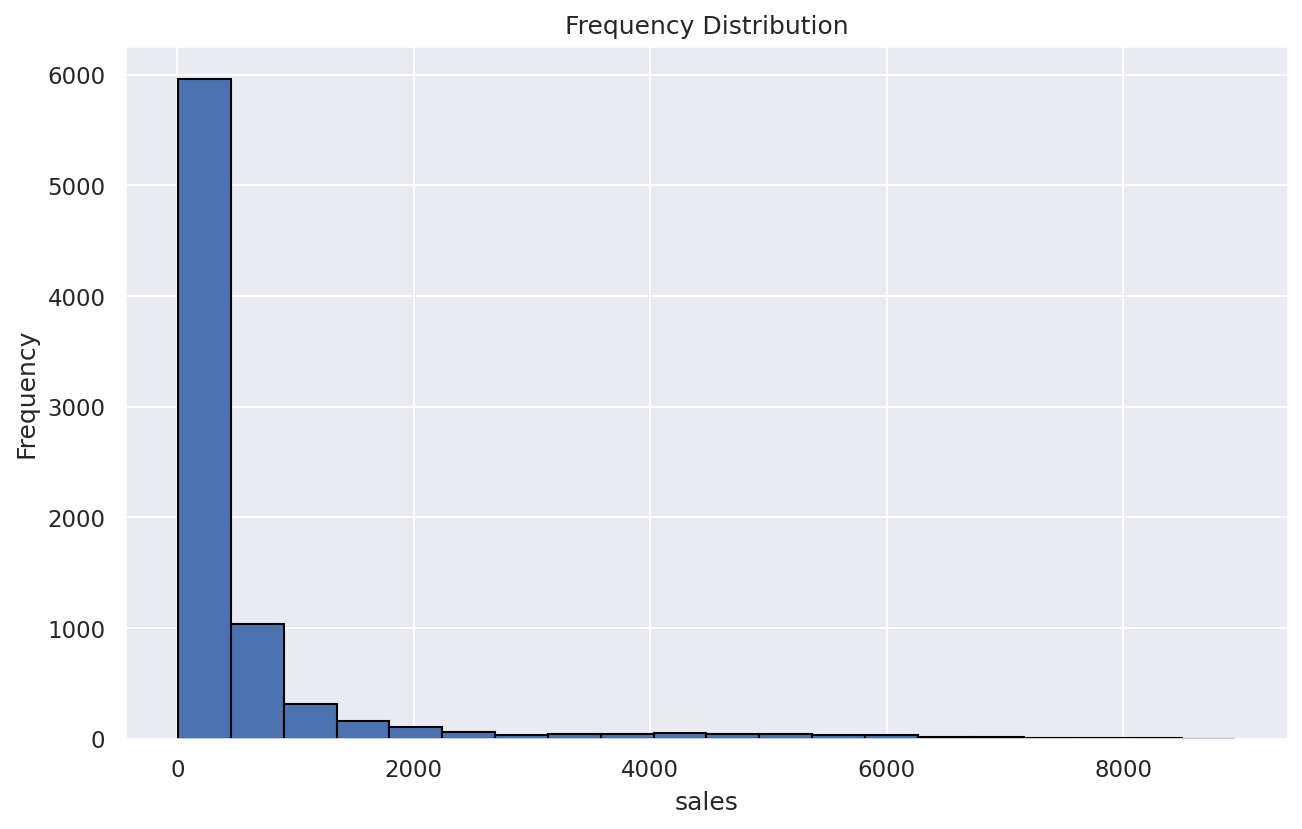

In [75]:
# Create a histogram with frequency
plt.figure(figsize=(10, 6))
dff[num_col].plot.hist(bins=20, edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()


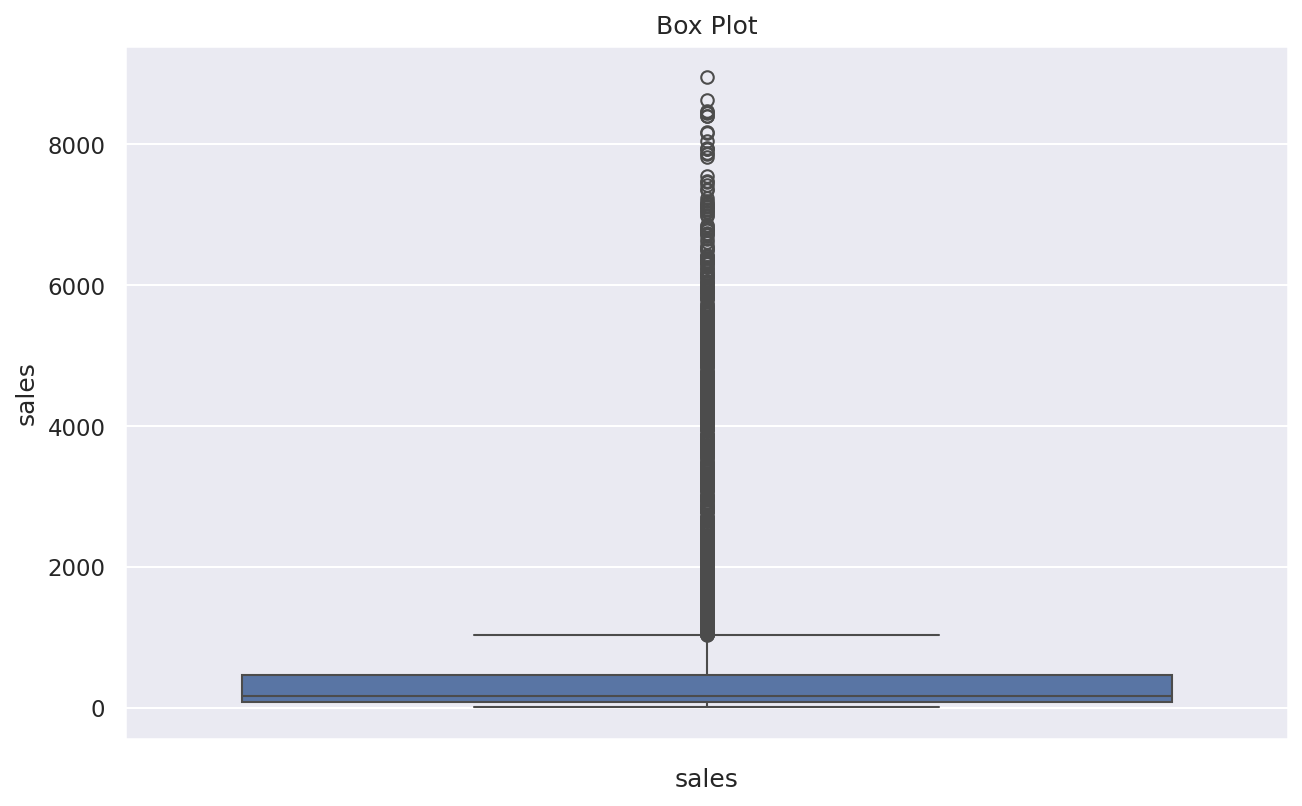

In [76]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(dff[num_col])
plt.title("Box Plot")
plt.xlabel(num_col)
plt.show()

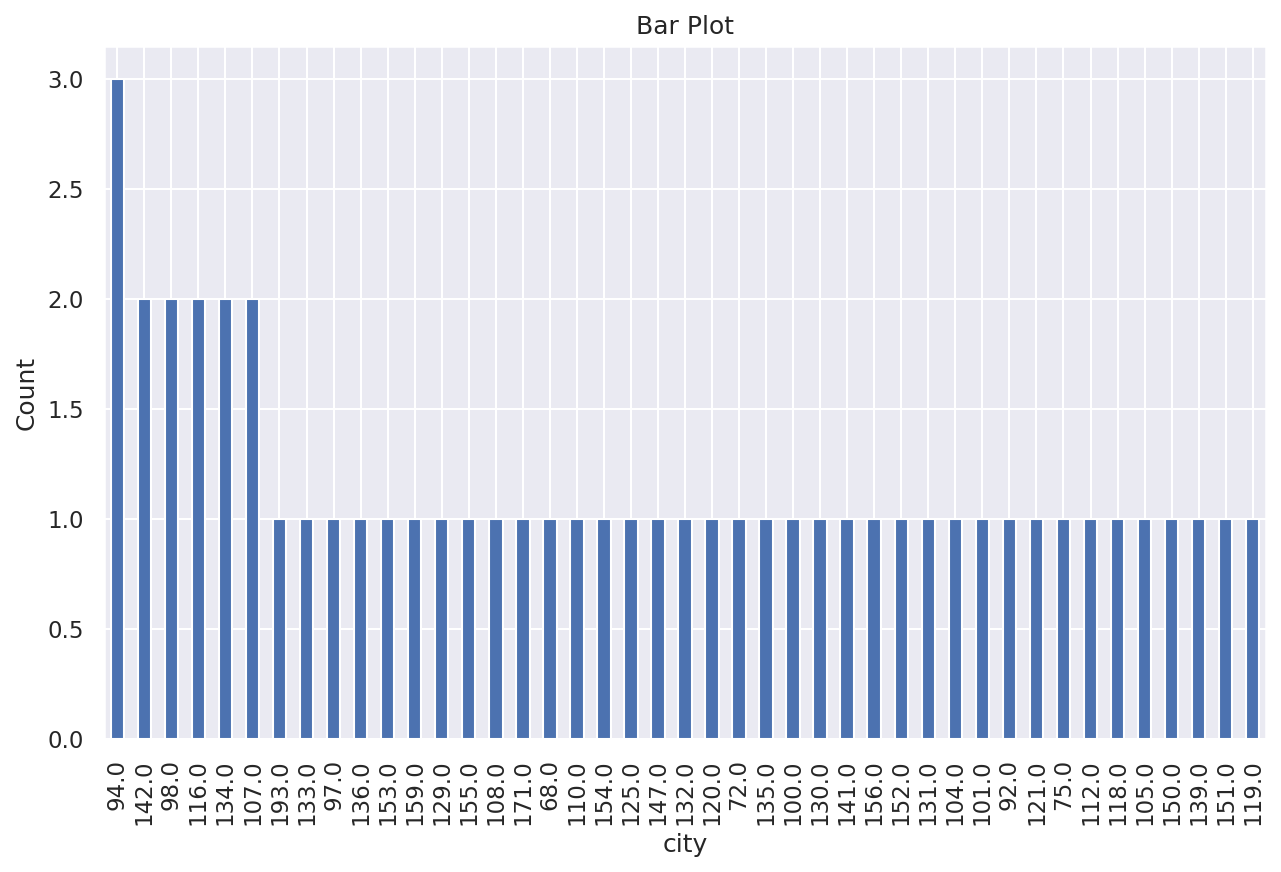

In [99]:
# Create a bar plot
n_col ="city"
plt.figure(figsize=(10, 6))
dff[num_col].head(50).astype(str).value_counts().plot(kind="bar")
plt.title("Bar Plot")
plt.xlabel(n_col)
plt.ylabel("Count")
plt.show()

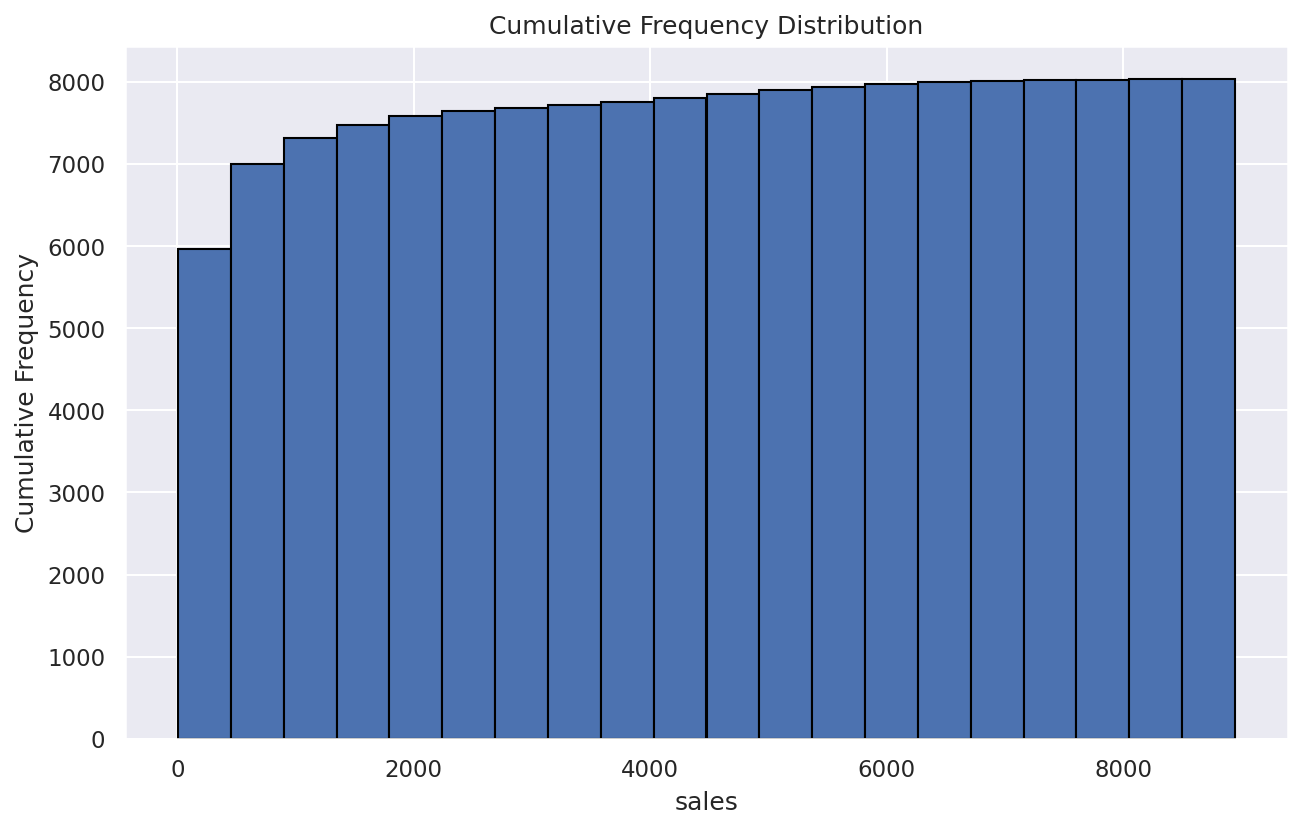

In [78]:

# Create a cumulative frequency plot
plt.figure(figsize=(10, 6))
dff[num_col].plot(kind="hist", cumulative=True, bins=20, edgecolor="black")
plt.title("Cumulative Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Cumulative Frequency")
plt.show()

In [ ]:
import ternary
import matplotlib.pyplot as plt

# Data: Patient ID, Protein (%), Carbohydrates (%), Fats (%), Symbol
data = [
    (20, 55, 30, "o"),  # Patient 1
    (15, 60, 25, "s"),  # Patient 2 (Square for differentiation)
    (30, 40, 30, "o"),  # Patient 3 (Circle)
    (10, 70, 20, "d"),  # Patient 4 (Diamond)
    (25, 45, 30, "^")   # Patient 5 (Triangle)
]

# Normalize Data: Convert percentages to proportions summing to 1
normalized_data = [(p/100, c/100, f/100, symbol) for p, c, f, symbol in data]

# Create a ternary plot
scale = 1  # Since data is already in proportion
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)  # Draw boundary
tax.gridlines(color="gray", multiple=0.1)  # Gridlines for readability

# Plot points with respective symbols
for p, c, f, symbol in normalized_data:
    tax.scatter([(p, c, f)], marker=symbol, color='red', s=100, label=f"({p*100:.0f},{c*100:.0f},{f*100:.0f})")

# Set Labels
tax.left_corner_label("Protein (%)", fontsize=12)
tax.right_corner_label("Carbohydrates (%)", fontsize=12)
tax.top_corner_label("Fats (%)", fontsize=12)

# Ticks and Styling
tax.ticks(axis='lbr', multiple=0.1, linewidth=1, fontsize=10)
tax.legend()
tax.show()



In [81]:
!pip install python-ternary


/usr/local/lib/python3.11/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


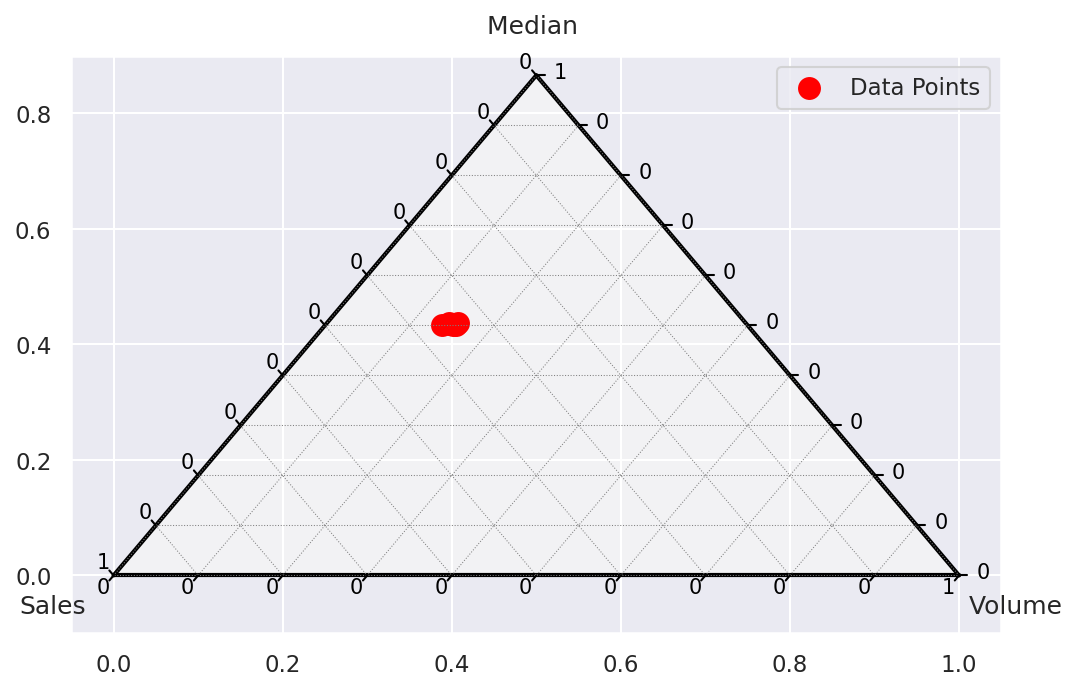

In [90]:
import ternary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (from your provided data)
data = {
    "sales": [72.0, 98.0, 130.0, 98.0, 141.0, 156.0, 152.0, 131.0, 104.0],
    "volume": [5380000.0, 6505000.0, 9285000.0, 9730000.0, 10590000.0, 13910000.0, 12635000.0, 10710000.0, 7615000.0],
    "median": [71400.0, 58700.0, 58100.0, 68600.0, 67300.0, 66900.0, 73500.0, 75000.0, 64500.0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Apply logarithmic scaling to bring values closer
df["sales_log"] = np.log1p(df["sales"])  # log1p(x) = log(1 + x) to handle zero safely
df["volume_log"] = np.log1p(df["volume"])
df["median_log"] = np.log1p(df["median"])

# Normalize the log-transformed values so they sum to 1
df["total"] = df["sales_log"] + df["volume_log"] + df["median_log"]
df["sales_norm"] = df["sales_log"] / df["total"]
df["volume_norm"] = df["volume_log"] / df["total"]
df["median_norm"] = df["median_log"] / df["total"]

# Extract normalized values
points = list(zip(df["sales_norm"], df["volume_norm"], df["median_norm"]))

# Create a ternary plot
scale = 1  # Since we normalized the data to sum to 1
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)  # Draw boundary
tax.gridlines(color="gray", multiple=0.1)  # Gridlines for readability

# Plot all points
tax.scatter(points, color='red', s=100, label="Data Points")

# Set Labels
tax.left_corner_label("Sales", fontsize=12)
tax.right_corner_label("Volume ", fontsize=12)
tax.top_corner_label("Median ", fontsize=12)

# Ticks and Styling
tax.ticks(axis='lbr', multiple=0.1, linewidth=1, fontsize=10)
tax.legend()
tax.show()
